# **Bank Loan Case Study**

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [6]:
def count_null_values(df,per=0):
 length = len(df)
 df1 = df.isnull().sum()*100/length
 df2 = df1[df1>=per]
 return df2.sort_values(ascending=False)

### Reading Input Data

In [11]:
application_file_location = "/content/application_data.csv"
df1= pd.read_csv(application_file_location)
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [12]:
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  298870.000000  298870.000000  298870.000000      2.988700e+05   
mean   273176.310376       0.080831       0.416870      1.688376e+05   
std     99899.312142       0.272576       0.722284      2.400076e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    186645.250000       0.000000       0.000000      1.125000e+05   
50%    273252.500000       0.000000       0.000000      1.467000e+05   
75%    359621.750000       0.000000       1.000000      2.025000e+05   
max    446236.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.988700e+05  298858.000000     2.986020e+05   
mean   5.991684e+05   27113.325593     5.385229e+05   
std    4.027801e+05   14502.422533     3.697167e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               298870.000000  298870.000000  298870.000000   
mean                     0.020870  -16035.653251   63740.441416   
std                      0.013829    4363.998328  141214.707112   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19679.000000   -2762.000000   
50%                      0.018850  -15748.000000   -1213.000000   
75%                      0.028663  -12411.000000    -290.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      298870.000000    298870.000000  101629.000000  298870.000000   
mean        -4987.309917     -2994.030374      12.056667       0.999997   
std          3523.048936      1509.549398      11.944339       0.001829   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7480.000000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.250000     -1719.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   298870.000000    298870.000000     298870.000000  298870.000000   
mean         0.820092         0.199394          0.998140       0.281069   
std          0.384111         0.399546          0.043092       0.449522   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  298870.000000    298868.000000         298870.000000   
mean        0.056791         2.152633              2.052494   
std         0.231442         0.910788              0.509132   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                298870.000000            298870.000000   
mean                      2.031552                12.063931   
std                       0.502807                 3.264793   
min                       1.000000                 0.000000   
25%                       

### Dealing with null values

In [13]:
null50 = count_null_values(df1,50)
null50

COMMONAREA_AVG              69.848764
COMMONAREA_MEDI             69.848764
COMMONAREA_MODE             69.848764
NONLIVINGAPARTMENTS_MEDI    69.415800
NONLIVINGAPARTMENTS_AVG     69.415800
NONLIVINGAPARTMENTS_MODE    69.415800
FONDKAPREMONT_MODE          68.372202
LIVINGAPARTMENTS_MEDI       68.339746
LIVINGAPARTMENTS_AVG        68.339746
LIVINGAPARTMENTS_MODE       68.339746
FLOORSMIN_MODE              67.828153
FLOORSMIN_MEDI              67.828153
FLOORSMIN_AVG               67.828153
YEARS_BUILD_MODE            66.476394
YEARS_BUILD_AVG             66.476394
YEARS_BUILD_MEDI            66.476394
OWN_CAR_AGE                 65.995583
LANDAREA_AVG                59.365610
LANDAREA_MEDI               59.365610
LANDAREA_MODE               59.365610
BASEMENTAREA_MEDI           58.513735
BASEMENTAREA_AVG            58.513735
BASEMENTAREA_MODE           58.513735
EXT_SOURCE_1                56.360290
NONLIVINGAREA_MODE          55.166126
NONLIVINGAREA_MEDI          55.166126
NONLIVINGARE

### #Drop value with 50% null value

In [14]:
df1.drop(null50.index,axis=1,inplace=True)
df1.shape

(298870, 81)

### #Check for the null values greater than 15%

In [16]:
print('Percentage (%) null values in each column')
null15 = count_null_values(df1,15)
null15

Percentage (%) null values in each column


FLOORSMAX_AVG                   49.743032
FLOORSMAX_MODE                  49.743032
FLOORSMAX_MEDI                  49.743032
YEARS_BEGINEXPLUATATION_AVG     48.764011
YEARS_BEGINEXPLUATATION_MODE    48.764011
YEARS_BEGINEXPLUATATION_MEDI    48.764011
TOTALAREA_MODE                  48.254425
EMERGENCYSTATE_MODE             47.381805
OCCUPATION_TYPE                 31.311607
EXT_SOURCE_3                    19.831030
dtype: float64

### #Remove those columns and drop remaining columns

In [17]:
columns_with_null = dict(null15)
del columns_with_null['EXT_SOURCE_3']
del columns_with_null['OCCUPATION_TYPE']
df1.shape

(298870, 81)

### Feature selection and remove unnecessary columns

### #Treating the columns with the null values

In [18]:
null_count = count_null_values(df1)
null_count

FLOORSMAX_AVG                   49.743032
FLOORSMAX_MODE                  49.743032
FLOORSMAX_MEDI                  49.743032
YEARS_BEGINEXPLUATATION_AVG     48.764011
YEARS_BEGINEXPLUATATION_MODE    48.764011
YEARS_BEGINEXPLUATATION_MEDI    48.764011
TOTALAREA_MODE                  48.254425
EMERGENCYSTATE_MODE             47.381805
OCCUPATION_TYPE                 31.311607
EXT_SOURCE_3                    19.831030
AMT_REQ_CREDIT_BUREAU_YEAR      13.504534
AMT_REQ_CREDIT_BUREAU_HOUR      13.504534
AMT_REQ_CREDIT_BUREAU_DAY       13.504534
AMT_REQ_CREDIT_BUREAU_WEEK      13.504534
AMT_REQ_CREDIT_BUREAU_MON       13.504534
AMT_REQ_CREDIT_BUREAU_QRT       13.504534
NAME_TYPE_SUITE                  0.418577
DEF_30_CNT_SOCIAL_CIRCLE         0.332251
OBS_60_CNT_SOCIAL_CIRCLE         0.332251
DEF_60_CNT_SOCIAL_CIRCLE         0.332251
OBS_30_CNT_SOCIAL_CIRCLE         0.332251
EXT_SOURCE_2                     0.213805
AMT_GOODS_PRICE                  0.089671
AMT_ANNUITY                      0

### #check correlation for the columns EXT_SOURCE_3 and EXT_SOURCE_2 to the targ
et column

<Axes: >

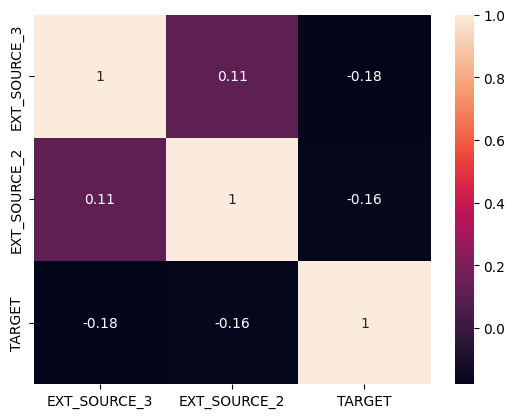

In [19]:
sns.heatmap(df1[['EXT_SOURCE_3','EXT_SOURCE_2','TARGET']].corr(),annot=True)

In [20]:
df1.drop(['EXT_SOURCE_3','EXT_SOURCE_2'],axis=1,inplace=True)
df1.shape

(298870, 79)

### #Now there are some columns named flag which contain some true false values

In [23]:
flags = []
for i in df1.columns:
 if 'FLAG' in i:
    flags.append(i)
flags

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

### #Drop unnecessary flag columns

In [30]:
remove_list = ['FLAG_OWN_REALTY','FLAG_OWN_CAR','FLAG_PHONE','FLAG_WORK_PHONE'
]
flags = list(set(flags) - set(remove_list))
# finally remove those columns
df1.drop(flags,axis=1,inplace=True)
# Dataset after removing unnecessary flag values
df1.shape

(298870, 55)

### Filling null value

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Laborers'),
  Text(2, 0, 'Sales staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Managers'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'High skill tech staff'),
  Text(7, 0, 'Accountants'),
  Text(8, 0, 'Medicine staff'),
  Text(9, 0, 'Security staff'),
  Text(10, 0, 'Cooking staff'),
  Text(11, 0, 'Cleaning staff'),
  Text(12, 0, 'Private service staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Waiters/barmen staff'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'Realty agents'),
  Text(17, 0, 'HR staff'),
  Text(18, 0, 'IT staff')])

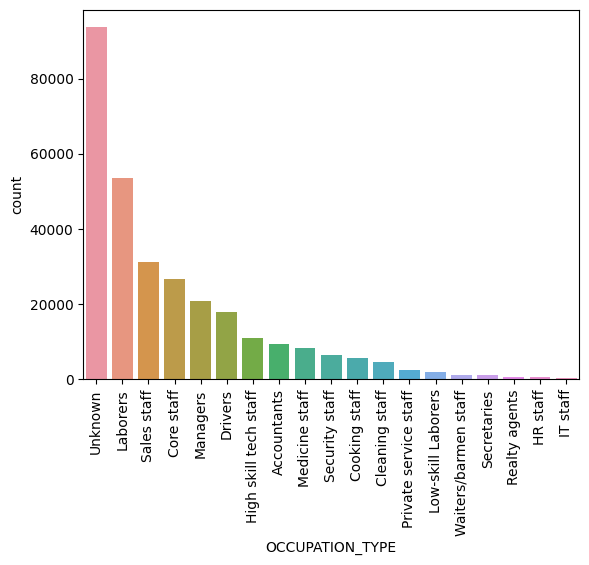

In [31]:
df1['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)
sns.countplot(x =df1['OCCUPATION_TYPE'],order = df1['OCCUPATION_TYPE'].value_counts().index
)
plt.xticks(rotation=90)

In [33]:
amt_req = []
for i in df1.columns:
 if "AMT_REQ" in i:
  amt_req.append(i)
amt_req

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [34]:
df1[amt_req].mean()

AMT_REQ_CREDIT_BUREAU_HOUR    0.006421
AMT_REQ_CREDIT_BUREAU_DAY     0.007052
AMT_REQ_CREDIT_BUREAU_WEEK    0.034347
AMT_REQ_CREDIT_BUREAU_MON     0.267287
AMT_REQ_CREDIT_BUREAU_QRT     0.265631
AMT_REQ_CREDIT_BUREAU_YEAR    1.900584
dtype: float64

In [36]:
df1[amt_req].mode()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0

In [37]:
df1[amt_req].median()

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    1.0
dtype: float64

In [38]:
try1 = df1[amt_req].fillna(df1[amt_req].median())

In [39]:
df1['NAME_TYPE_SUITE'].fillna('Unknown',inplace=True)

In [41]:
social_circle = []
for i in df1.columns:
 if 'SOCIAL_CIRCLE' in i:
  social_circle.append(i)
social_circle 

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [42]:
df1[social_circle].mean()

OBS_30_CNT_SOCIAL_CIRCLE    1.422681
DEF_30_CNT_SOCIAL_CIRCLE    0.143559
OBS_60_CNT_SOCIAL_CIRCLE    1.405678
DEF_60_CNT_SOCIAL_CIRCLE    0.100112
dtype: float64

In [43]:
df1[social_circle].mode()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       0.0                       0.0

In [44]:
df1[social_circle].median()

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [45]:
df1[social_circle] = df1[social_circle].fillna(df1[social_circle].median())

In [46]:
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].mean(),inplace=True)

In [47]:
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].mean(),inplace=True)


In [48]:
df1['CNT_FAM_MEMBERS'].fillna(df1['CNT_FAM_MEMBERS'].median(),inplace=True)

In [49]:
df1['DAYS_LAST_PHONE_CHANGE'].fillna(df1['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)

In [51]:
days = []
for i in df1.columns:
 if 'DAYS' in i:
  days.append(i)
days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [54]:
df1[days] = abs(df1[days])/365
df1.rename(columns = {'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)

### Reading the dataset previous_applications.csv

In [56]:
df = pd.read_csv('/content/previous_application.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171260 entries, 0 to 171259
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   171260 non-null  int64  
 1   SK_ID_CURR                   171260 non-null  int64  
 2   NAME_CONTRACT_TYPE           171260 non-null  object 
 3   AMT_ANNUITY                  134637 non-null  float64
 4   AMT_APPLICATION              171259 non-null  float64
 5   AMT_CREDIT                   171259 non-null  float64
 6   AMT_DOWN_PAYMENT             83469 non-null   float64
 7   AMT_GOODS_PRICE              133673 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   171259 non-null  object 
 9   HOUR_APPR_PROCESS_START      171259 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  171259 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       171259 non-null  float64
 12  RATE_DOWN_PAYMENT            83469 non-null   float64
 13 

In [57]:
df.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  1.712600e+05  171260.000000  134637.000000     1.712590e+05   
mean   1.919741e+06  278719.140967   15532.635304     1.697844e+05   
std    5.344304e+05  102855.832468   14522.351767     2.839742e+05   
min    1.000001e+06  100006.000000       0.000000     0.000000e+00   
25%    1.456136e+06  189766.500000    6169.455000     2.110500e+04   
50%    1.918981e+06  279048.000000   10956.150000     7.105500e+04   
75%    2.383123e+06  368237.000000   19866.600000     1.800000e+05   
max    2.845377e+06  456254.000000  417927.645000     3.826372e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.712590e+05      8.346900e+04     1.336730e+05   
mean   1.895623e+05      6.632274e+03     2.175552e+05   
std    3.100716e+05      1.826219e+04     3.048750e+05   
min    0.000000e+00      0.000000e+00     0.000000e+00   
25%    2.542050e+04      0.000000e+00     4.945500e+04   
50%    7.911900e+04      1.660500e+03     1.065555e+05   
75%    2.025000e+05      7.731000e+03     2.250000e+05   
max    4.104351e+06      1.201500e+06     3.826372e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count            171259.000000           171259.000000       83469.000000   
mean                 12.467905                0.996386           0.079513   
std                   3.318869                0.060011           0.107576   
min                   0.000000                0.000000           0.000000   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.050977   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           0.989740   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count             605.000000                605.000000  171259.000000   
mean                0.195318                  0.778220    -898.812600   
std                 0.102318                  0.098956     786.654324   
min                 0.059135                  0.424419   -2922.000000   
25%                 0.160716                  0.715645   -1340.000000   
50%                 0.189136                  0.835095    -597.000000   
75%                 0.193330                  0.852537    -288.000000   
max                 1.000000                  0.867336      -2.000000   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.712590e+05  134636.000000       105098.000000   105098.000000   
mean       3.561245e+02      15.606220       343550.073037    14036.213953   
std        1.375637e+04      14.104235        86455.145085    72938.300083   
min       -1.000000e+00       0.000000        -2920.000000    -2891.000000   
25%       -1.000000e+00       6.000000       365243.000000    -1645.000000   
50%        1.000000e+01      12.000000       365243.000000     -828.000000   
75%        1.000000e+02      18.000000       365243.000000     -407.000000   
max        4.000000e+06      84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              105098.000000  105098.000000     105098.000000   
mean                32438.205170   76251.977478      81272.719262   
std                105001.602475  149420.665455     152838.503009   
min                 -2800.000000   -2888.000000      -2847.000000   
25%                 -1266.000000   -1334.000000      -1292.000000   
50%                  -369.000000    -538.000000       -502.000000   
75%                   114.000000     -74.000000        -47.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              105098.000000  
mean                    0.325981  
std                     0.468743  
min                     0.000000  
25%

### Dealing with null values

In [58]:
count_null_values(df)

RATE_INTEREST_PRIVILEGED       99.646736
RATE_INTEREST_PRIMARY          99.646736
RATE_DOWN_PAYMENT              51.261824
AMT_DOWN_PAYMENT               51.261824
NAME_TYPE_SUITE                48.638328
NFLAG_INSURED_ON_APPROVAL      38.632489
DAYS_FIRST_DRAWING             38.632489
DAYS_FIRST_DUE                 38.632489
DAYS_LAST_DUE_1ST_VERSION      38.632489
DAYS_LAST_DUE                  38.632489
DAYS_TERMINATION               38.632489
AMT_GOODS_PRICE                21.947332
CNT_PAYMENT                    21.385029
AMT_ANNUITY                    21.384445
PRODUCT_COMBINATION             0.020437
CHANNEL_TYPE                    0.000584
NAME_PRODUCT_TYPE               0.000584
NAME_YIELD_GROUP                0.000584
SELLERPLACE_AREA                0.000584
NAME_SELLER_INDUSTRY            0.000584
NAME_GOODS_CATEGORY             0.000584
NAME_PORTFOLIO                  0.000584
NAME_PAYMENT_TYPE               0.000584
NAME_CLIENT_TYPE                0.000584
CODE_REJECT_REAS

### #Find the columns with more than 40% of null values

In [59]:
null40 = count_null_values(df,40)
null40

RATE_INTEREST_PRIMARY       99.646736
RATE_INTEREST_PRIVILEGED    99.646736
AMT_DOWN_PAYMENT            51.261824
RATE_DOWN_PAYMENT           51.261824
NAME_TYPE_SUITE             48.638328
dtype: float64

### #Drop all the values with more than 40% of null values

In [61]:
df.drop(null40.index,axis=1,inplace=True)
df.shape

(171260, 32)

### #Remove the columns which are unnecessary

In [62]:
df.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
df.shape

(171260, 28)

### #Now find the columns with missing values more than 15%

In [63]:
null15 = count_null_values(df,15)
null15

DAYS_FIRST_DRAWING           38.632489
DAYS_FIRST_DUE               38.632489
DAYS_LAST_DUE_1ST_VERSION    38.632489
DAYS_LAST_DUE                38.632489
DAYS_TERMINATION             38.632489
NFLAG_INSURED_ON_APPROVAL    38.632489
AMT_GOODS_PRICE              21.947332
CNT_PAYMENT                  21.385029
AMT_ANNUITY                  21.384445
dtype: float64

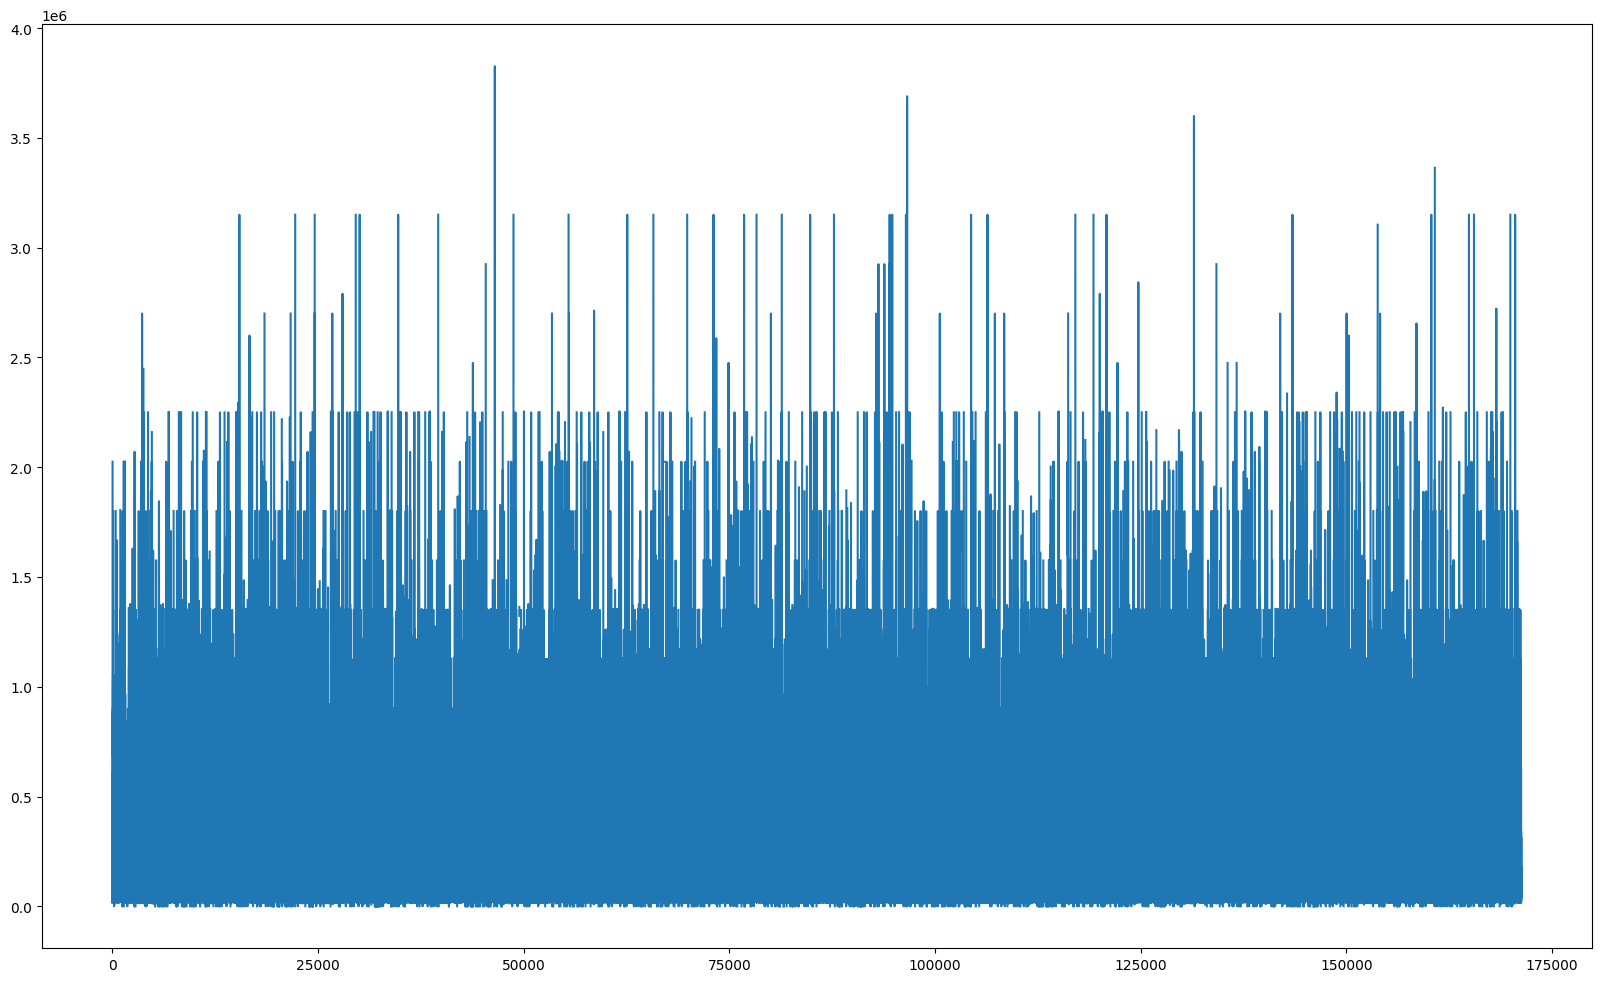

In [64]:
plt.figure(figsize=(20,12))
plt.plot(df['AMT_GOODS_PRICE'])

In [65]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace=True)

Text(0.5, 1.0, 'AMT_ANNUITY')

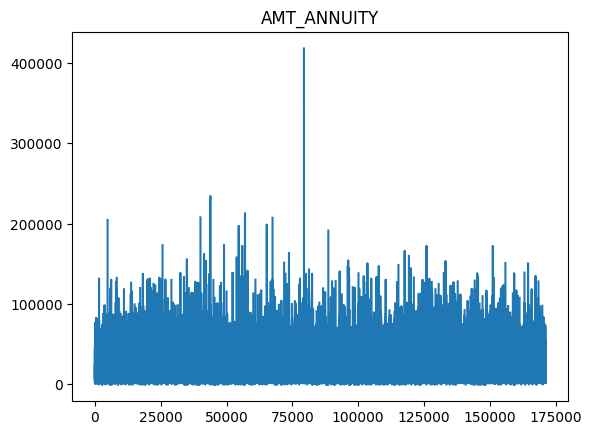

In [66]:
plt.plot(df['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')

In [67]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean(),inplace=True)

In [68]:
df['CNT_PAYMENT'].fillna(df['CNT_PAYMENT'].median(),inplace=True)

## Check Outliers


### Application_data.csv

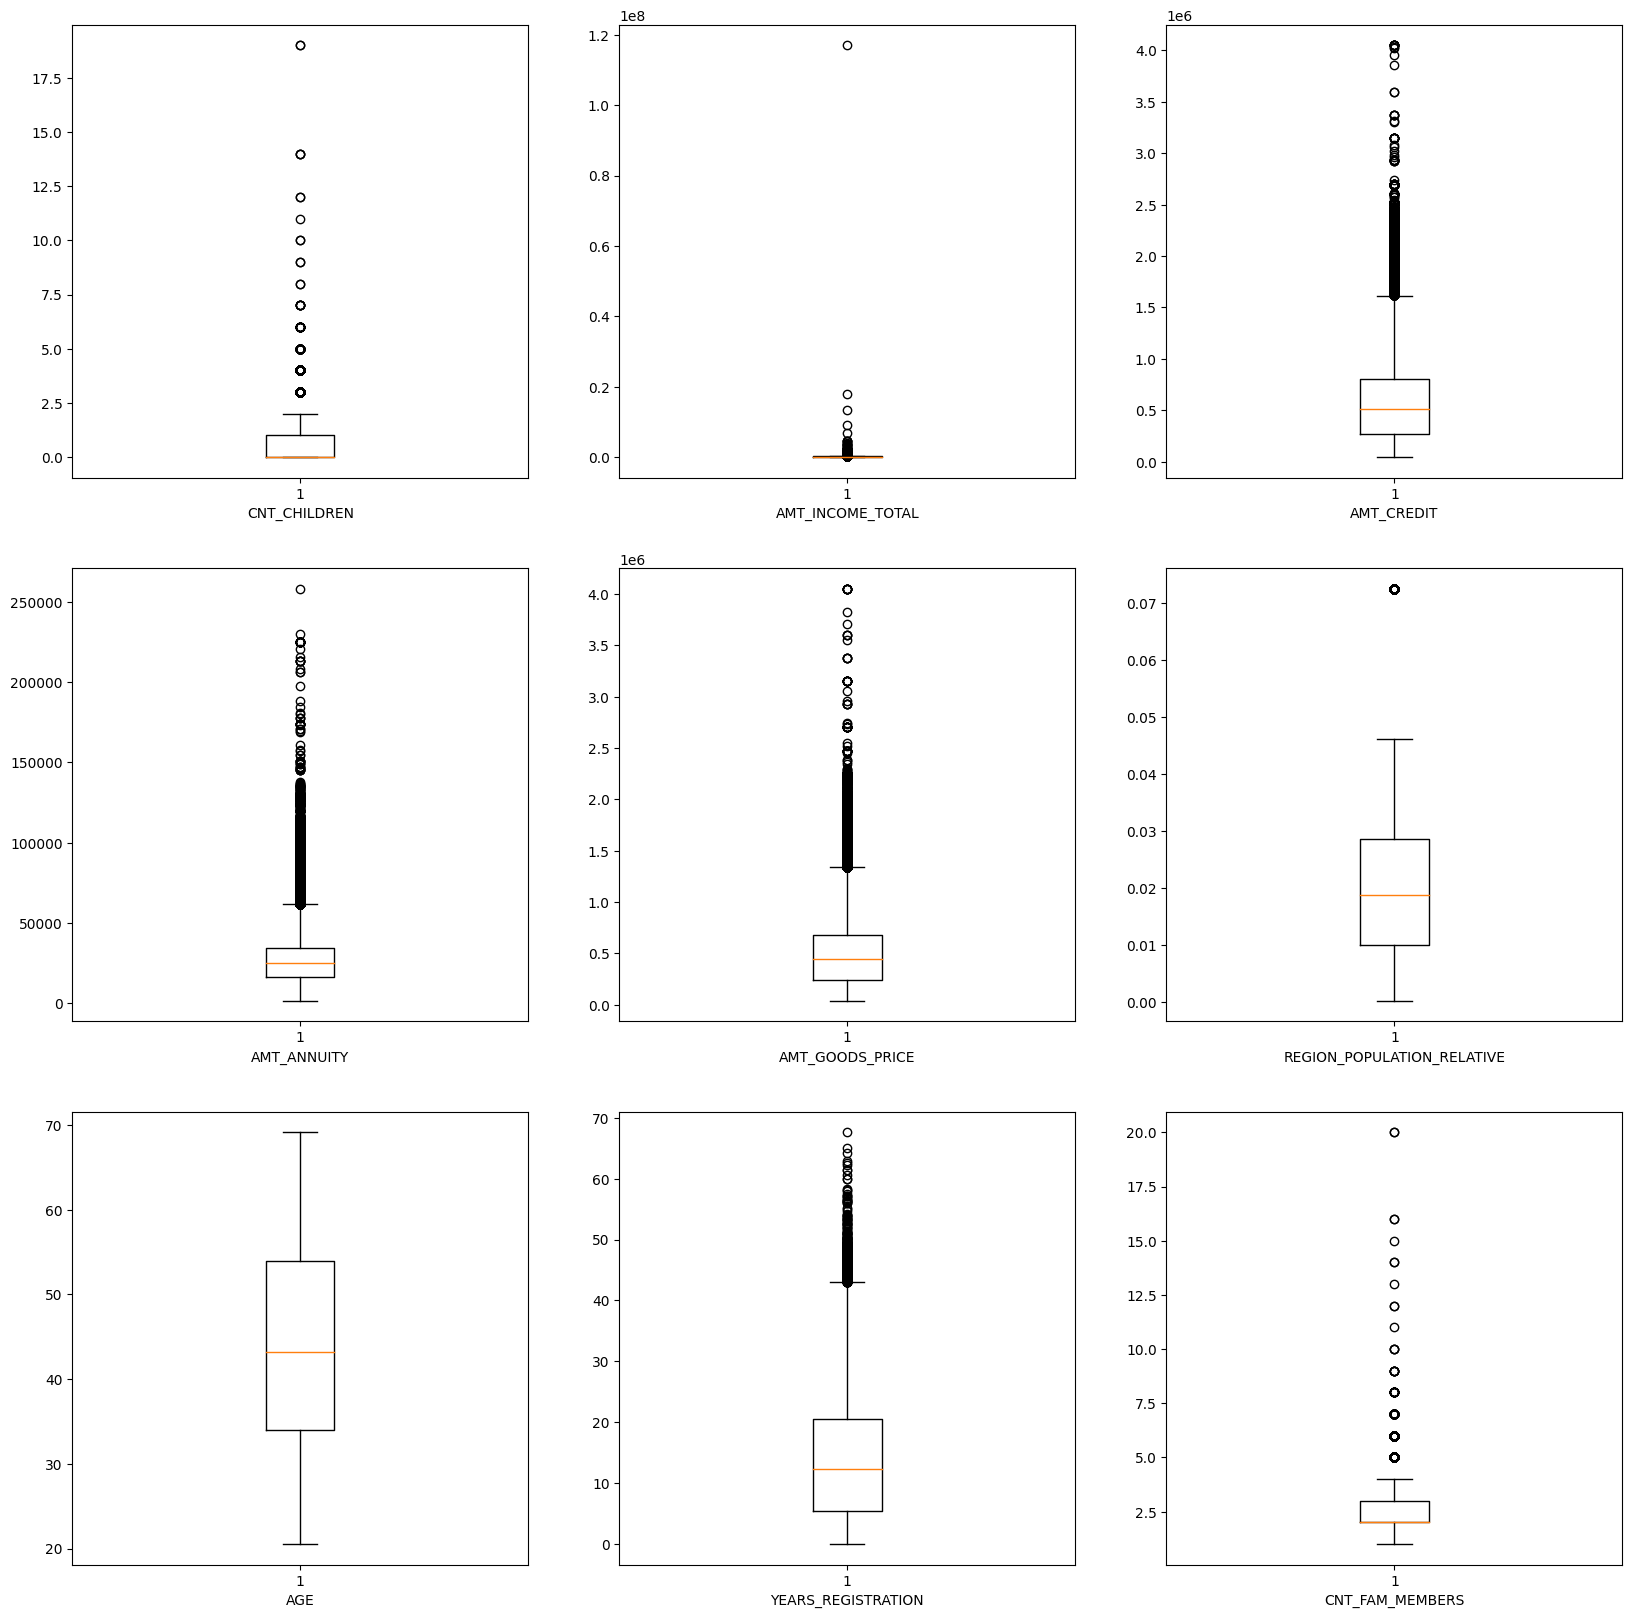

In [73]:
out_check = 'CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_REGISTRATION,CNT_FAM_MEMBERS'.split(',')
plt.figure(figsize=(20,20))
#df1.boxplot(column = out_check, grid=False, rot=90, fontsize=15) 
for i in range(len(out_check)):
 plt.subplot(3,3,i+1)
 plt.boxplot(df1[out_check[i]])
 plt.xlabel(out_check[i])


### Previous_application.csv

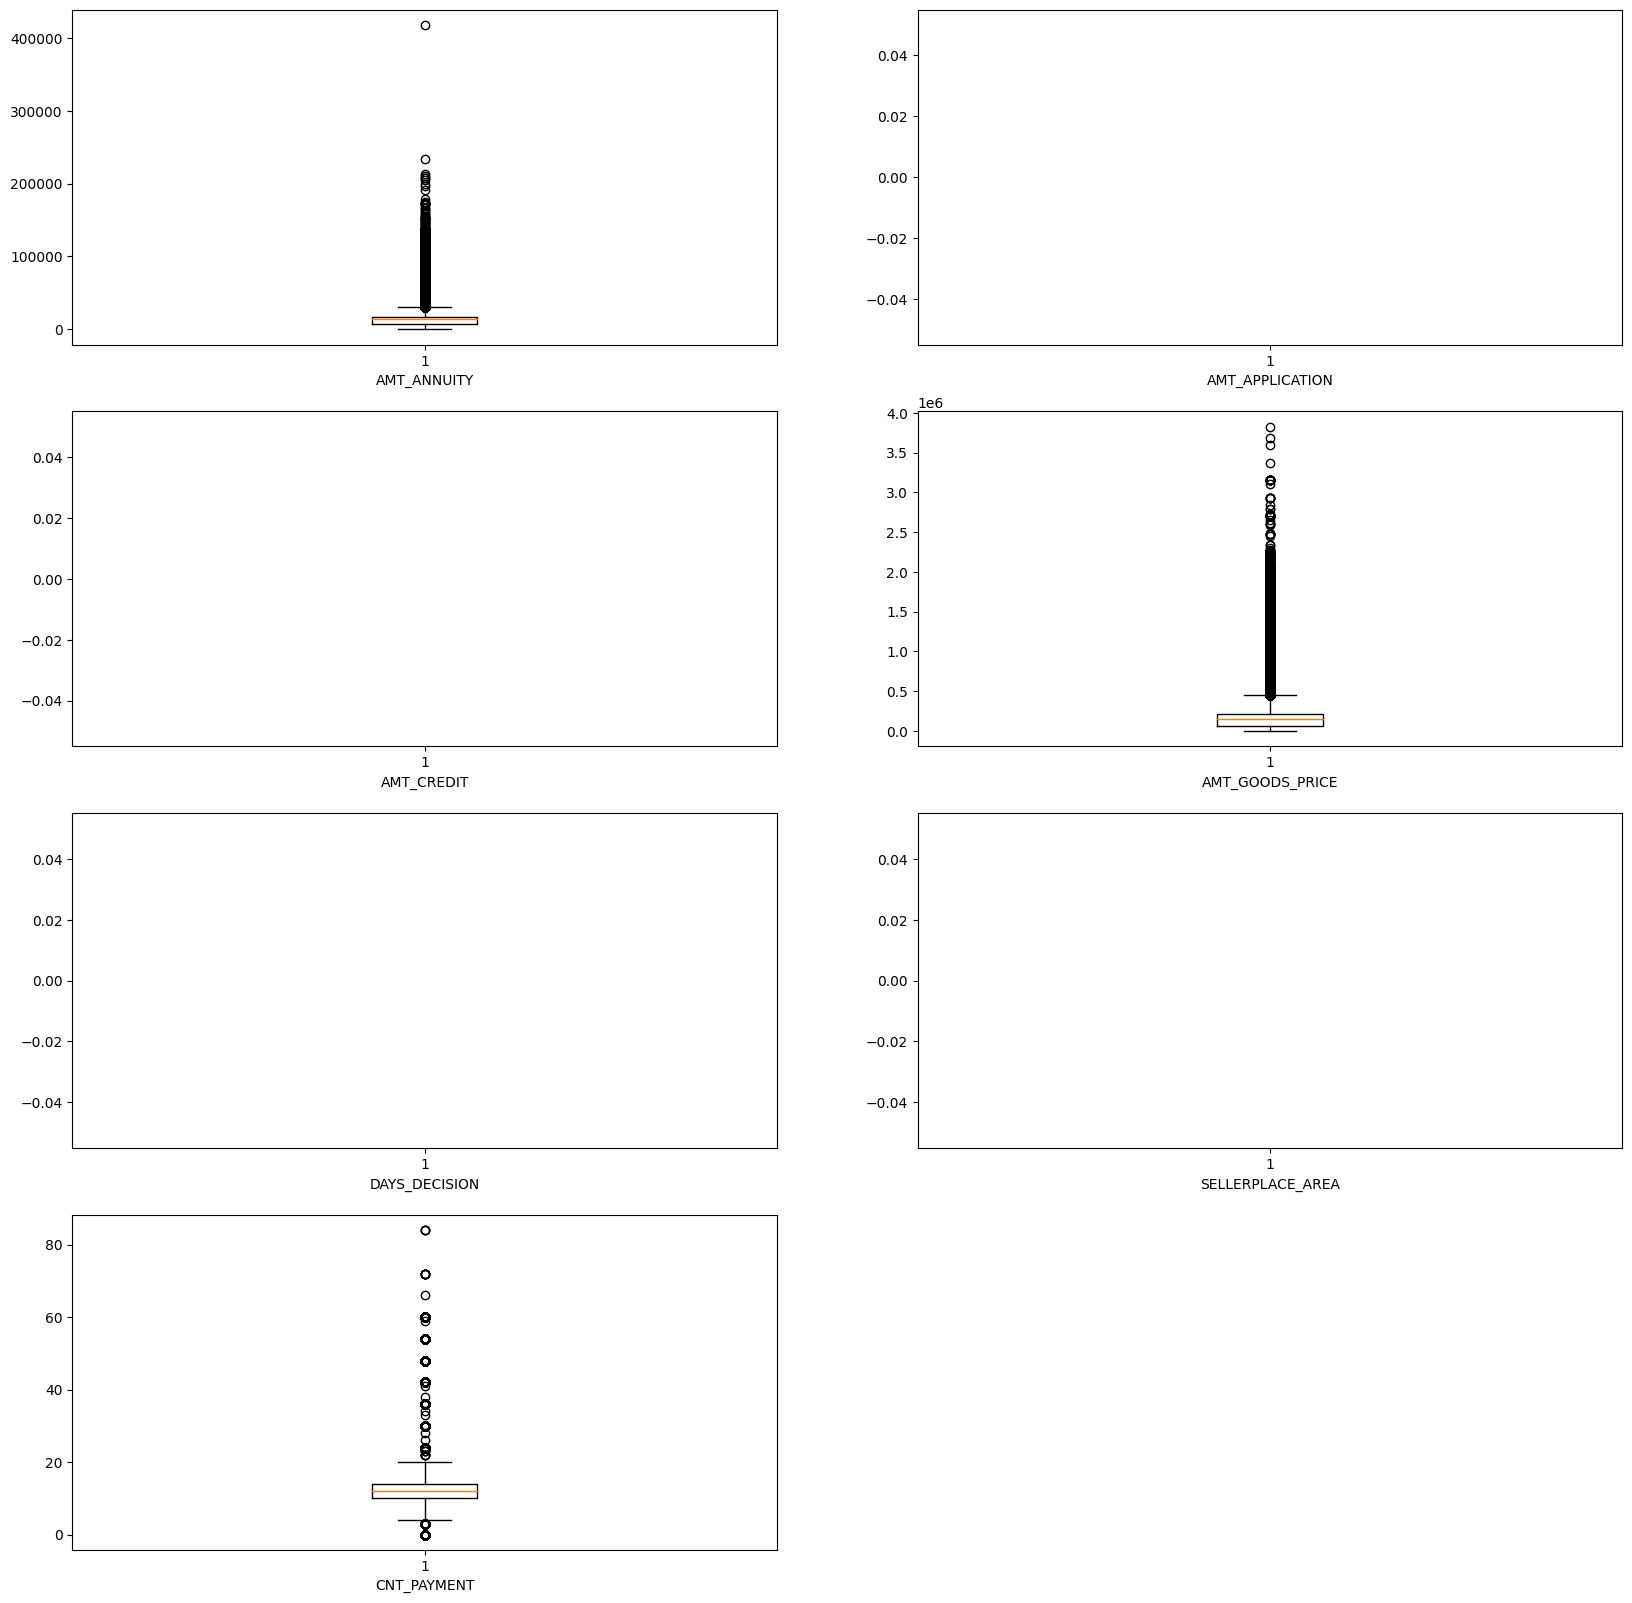

In [74]:
out_check2 = 'AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT'.split(',')
plt.figure(figsize=(20,20))
#df1.boxplot(column = out_check, grid=False, rot=90, fontsize=15) 
for i in range(len(out_check2)):
 plt.subplot(4,2,i+1)
 plt.boxplot(df[out_check2[i]])
 plt.xlabel(out_check2[i])


## Data Imbalance

In [82]:
df1["TARGET"] = df1["TARGET"].replace({1:"Defaulter",0:"Repayer"})

In [76]:
df1['TARGET'].value_counts()*100/len(df1)

Repayer      91.916887
Defaulter     8.083113
Name: TARGET, dtype: float64

## Univariate Analysis for application_data.csv

In [86]:
def addlabels(x,y):
 for i in range(len(x)):
  plt.text(i, y[i]//2, y[i], ha = 'center')
def univariate(df,data,target):
 col = df[data]
 tar = df[target]
 types = col.dtypes
 ex = col.value_counts()
 if len(ex)>8:
  plt.figure(figsize = (20,12))
  sns.countplot(x = col, hue = tar)
  plt.xticks(rotation = 90)
  plt.title(data,fontdict={'fontsize': 20})
 elif len(ex)>4:
  plt.figure(figsize = (15,8))
  sns.countplot(x = col, hue = tar)
  plt.xticks(rotation = 45)
  plt.title(data,fontdict={'fontsize': 20})
 else:
  plt.figure()
  sns.countplot(x = col, hue = tar)
  plt.title(data,fontdict={'fontsize': 14})
 plt.xlabel(data)
 pf = df[[data,target]].value_counts().reset_index()
 percent= []
 for i in pf[data].unique():
  try:
   percent.append(pf[(pf[data]==i)&(pf[target]=='Defaulter')][0].values[0]*100/(pf[(pf[data]==i)&(pf[target]=='Defaulter')][0].values[0]+pf[(pf[data]==i)&(pf[target]=='Repayer')][0].values[0]))
  except:
   percent.append(0)
 if len(percent)>8:
  plt.figure(figsize = (20,12))
  sns.barplot(y = percent, x = pf[data].unique())
  plt.xticks(rotation = 90)
  plt.title('Defaulter % in '+data,fontdict={'fontsize': 20})
 elif len(percent)>4:
  plt.figure(figsize = (15,8))
  sns.barplot(y = percent, x = pf[data].unique())
  plt.xticks(rotation = 45)
  plt.title('Defaulter % in '+data,fontdict={'fontsize': 20})
 else:
  plt.figure()
  sns.barplot(y = percent, x = pf[data].unique())
  plt.title('Defaulter % in '+data,fontdict={'fontsize': 14})
  plt.xlabel(data)
  plt.ylabel(target)
  addlabels(x = pf[data].unique(),y=np.round(percent,1))

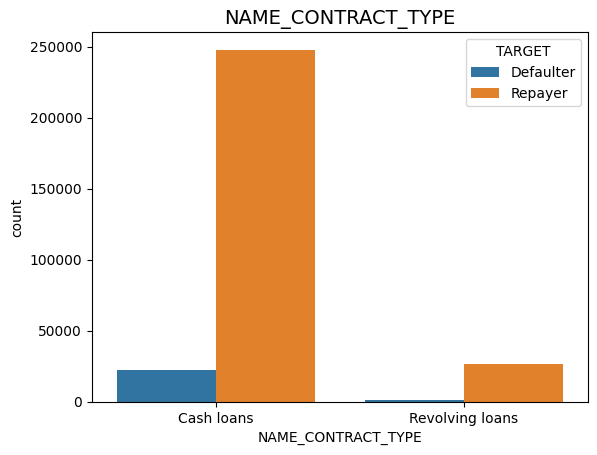

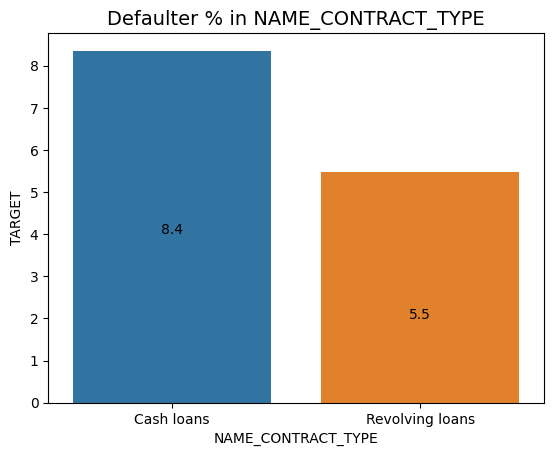

In [87]:
univariate(df1,'NAME_CONTRACT_TYPE','TARGET')

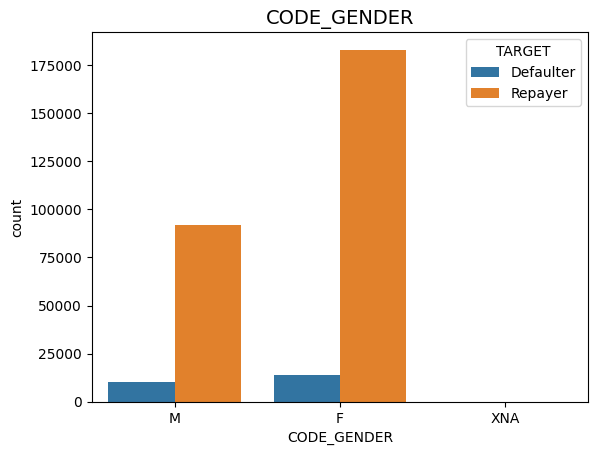

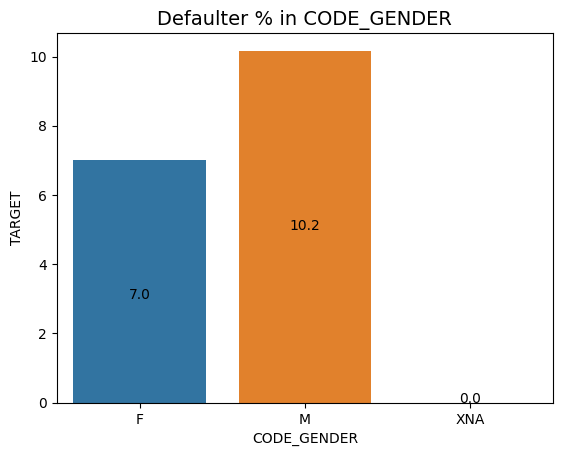

In [88]:
univariate(df1,'CODE_GENDER','TARGET')

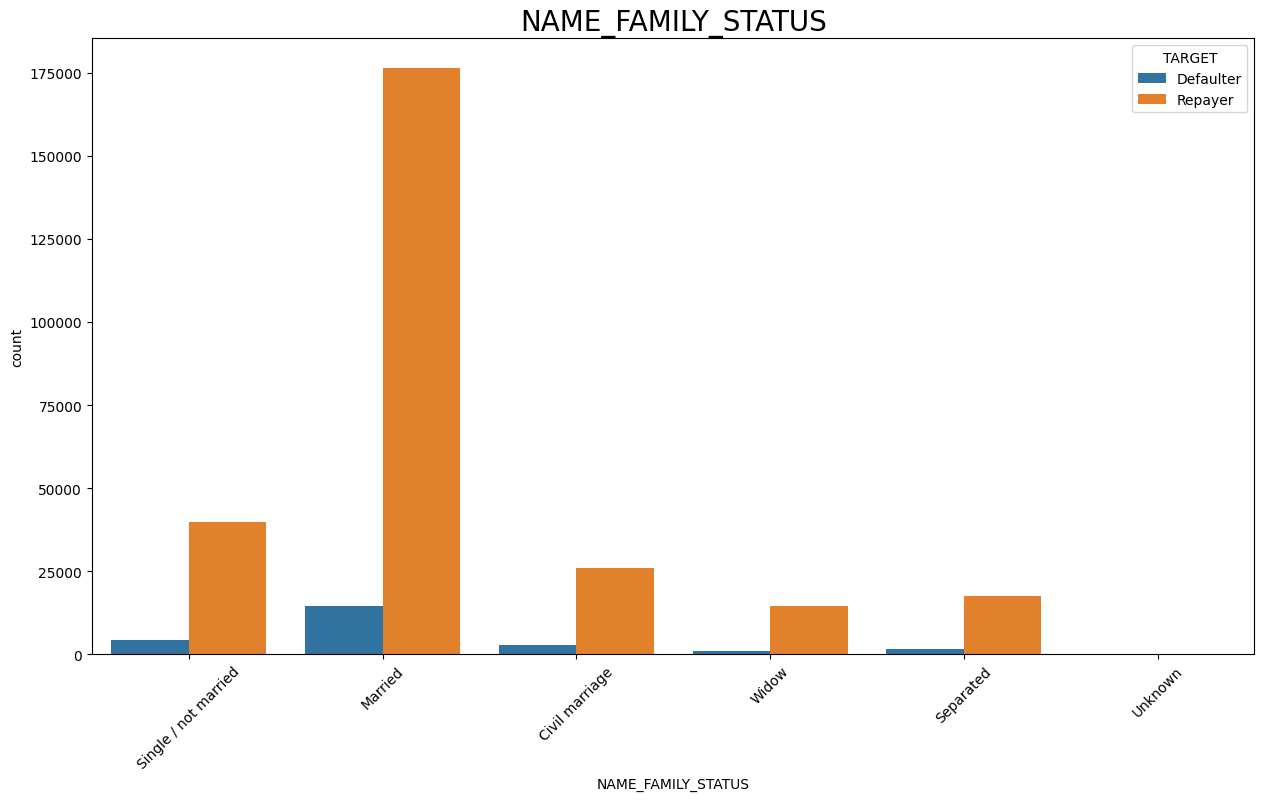

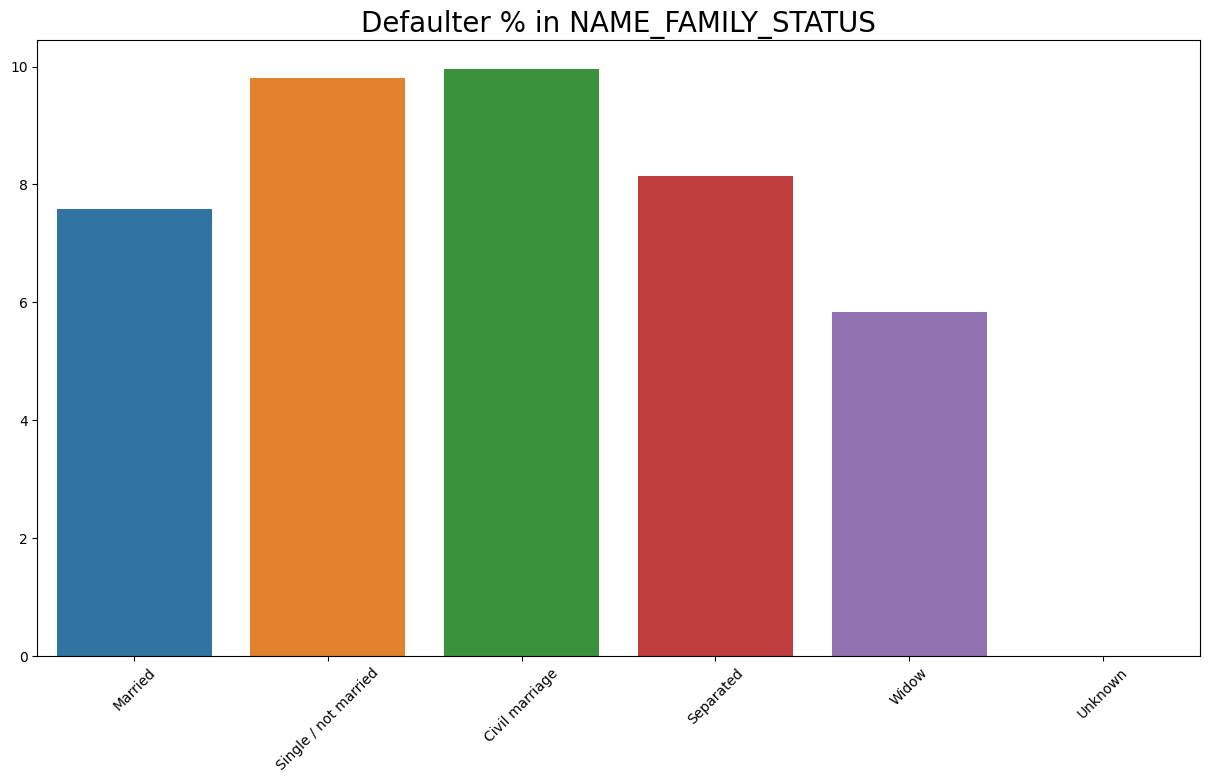

In [89]:
univariate(df1,'NAME_FAMILY_STATUS','TARGET')

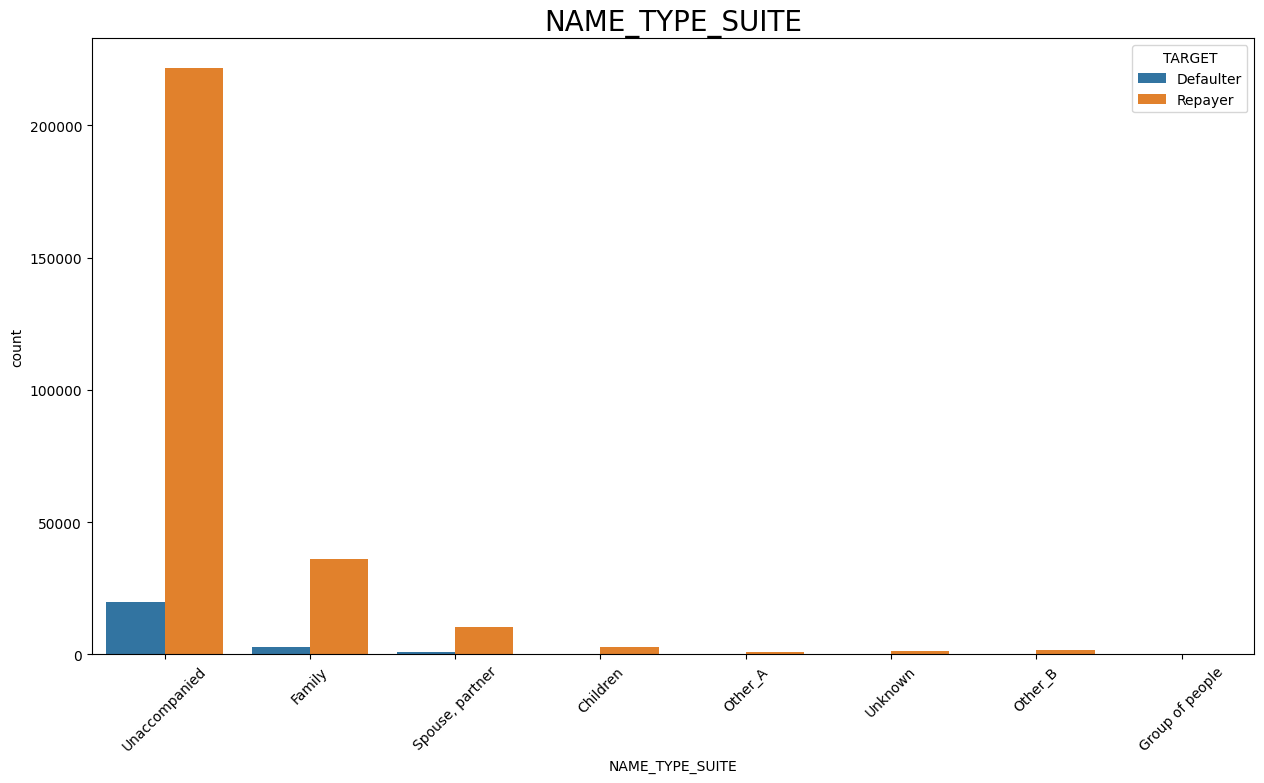

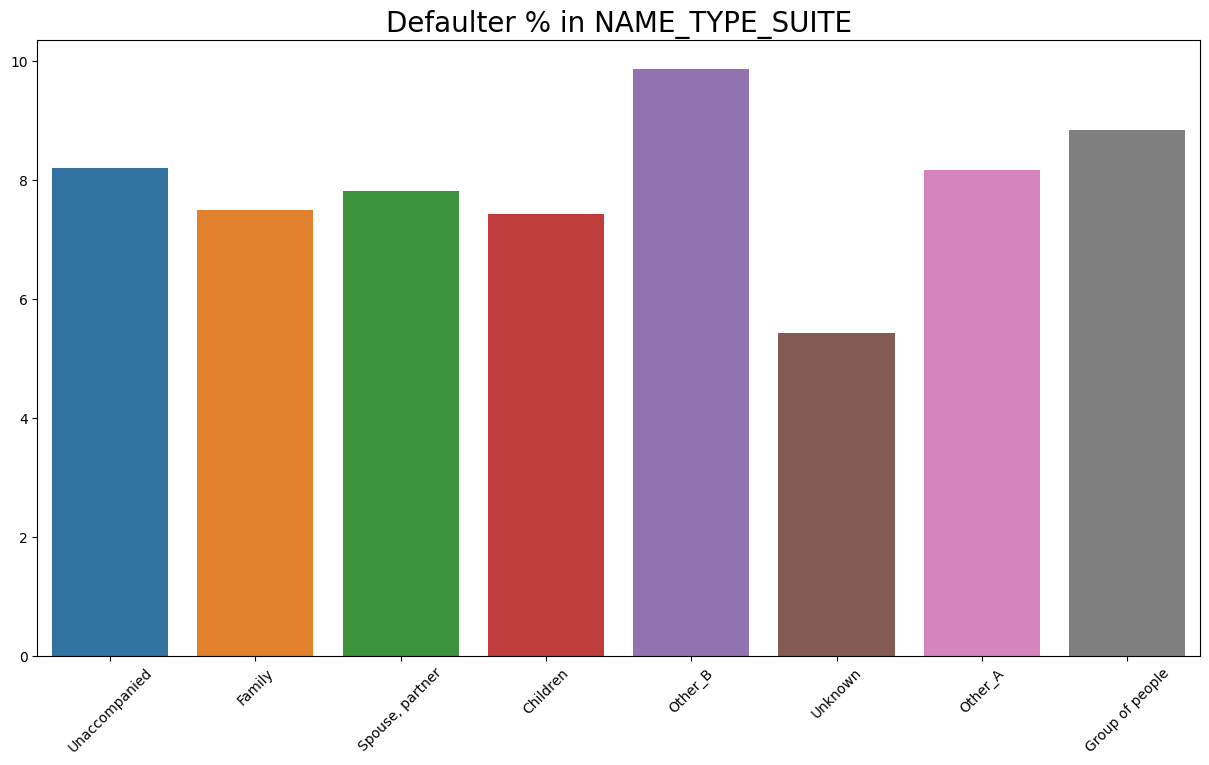

In [90]:
univariate(df1,'NAME_TYPE_SUITE','TARGET')

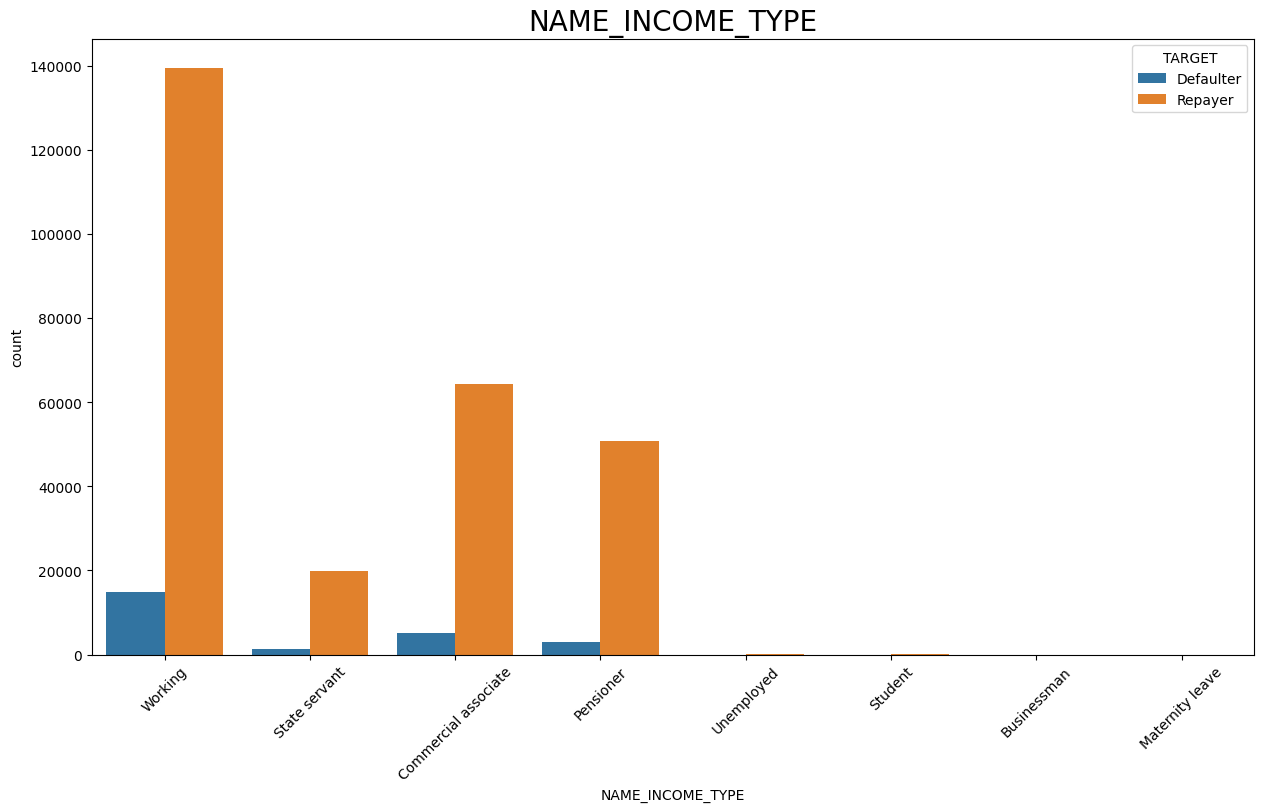

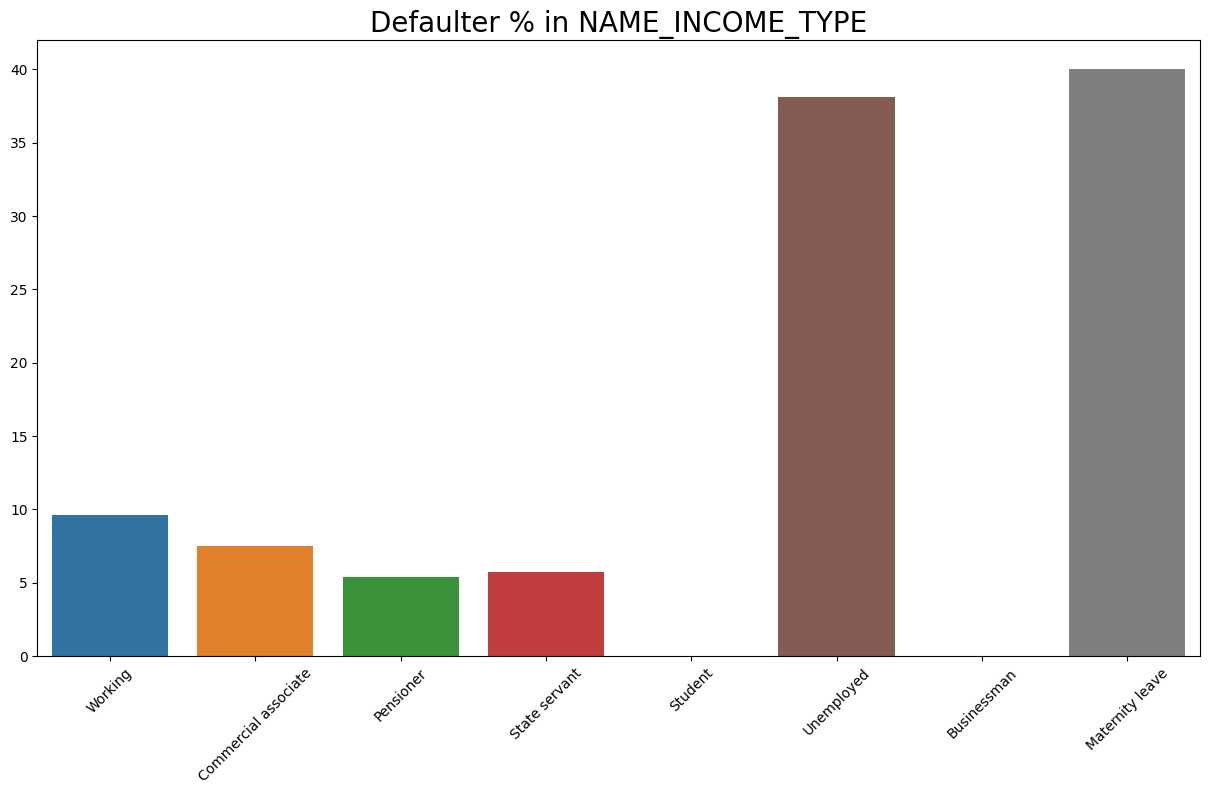

In [91]:
univariate(df1,'NAME_INCOME_TYPE','TARGET')

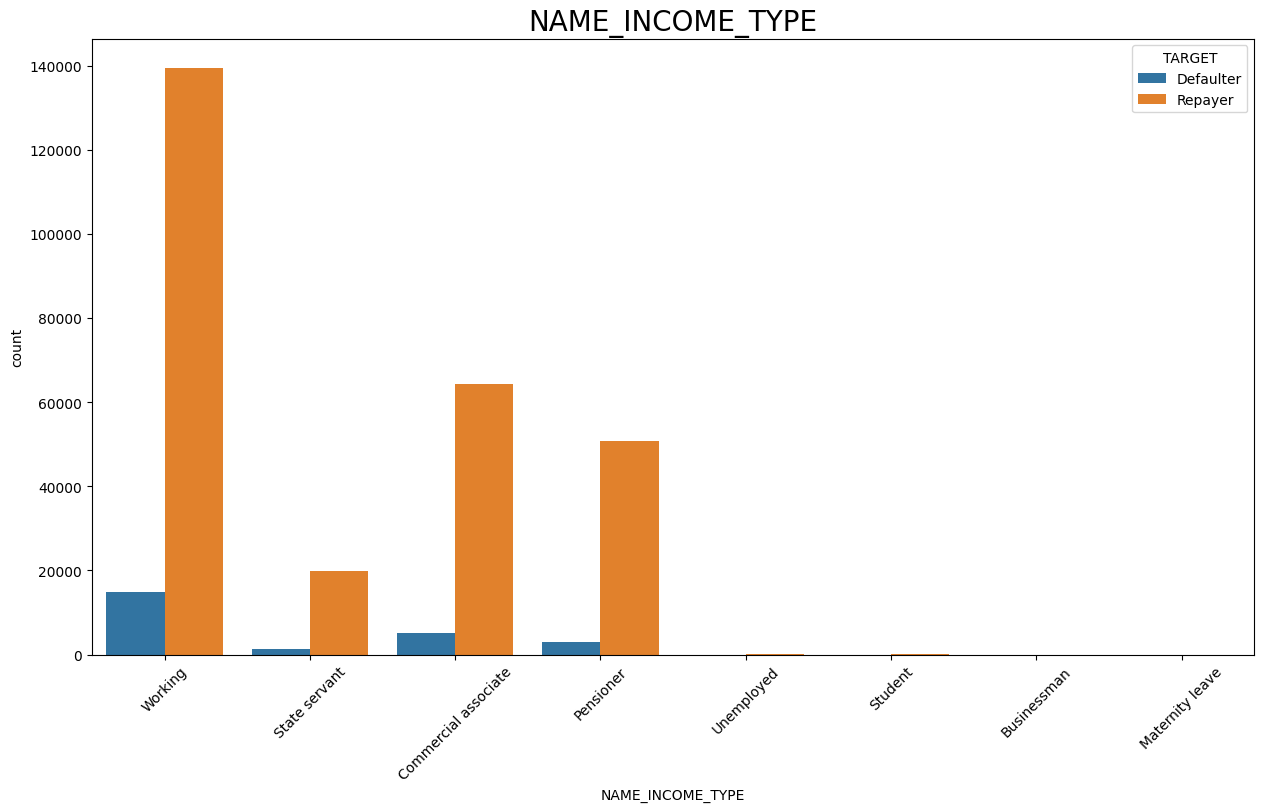

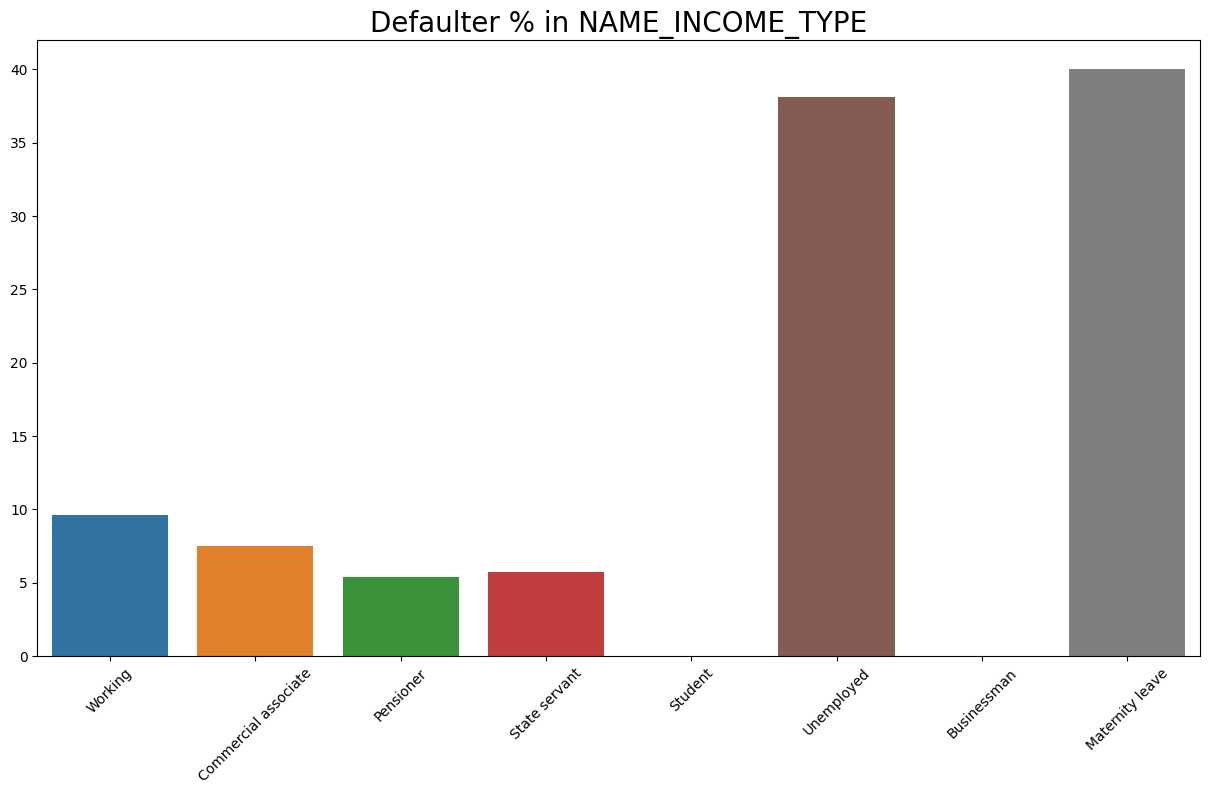

In [92]:
univariate(df1,'NAME_INCOME_TYPE','TARGET')

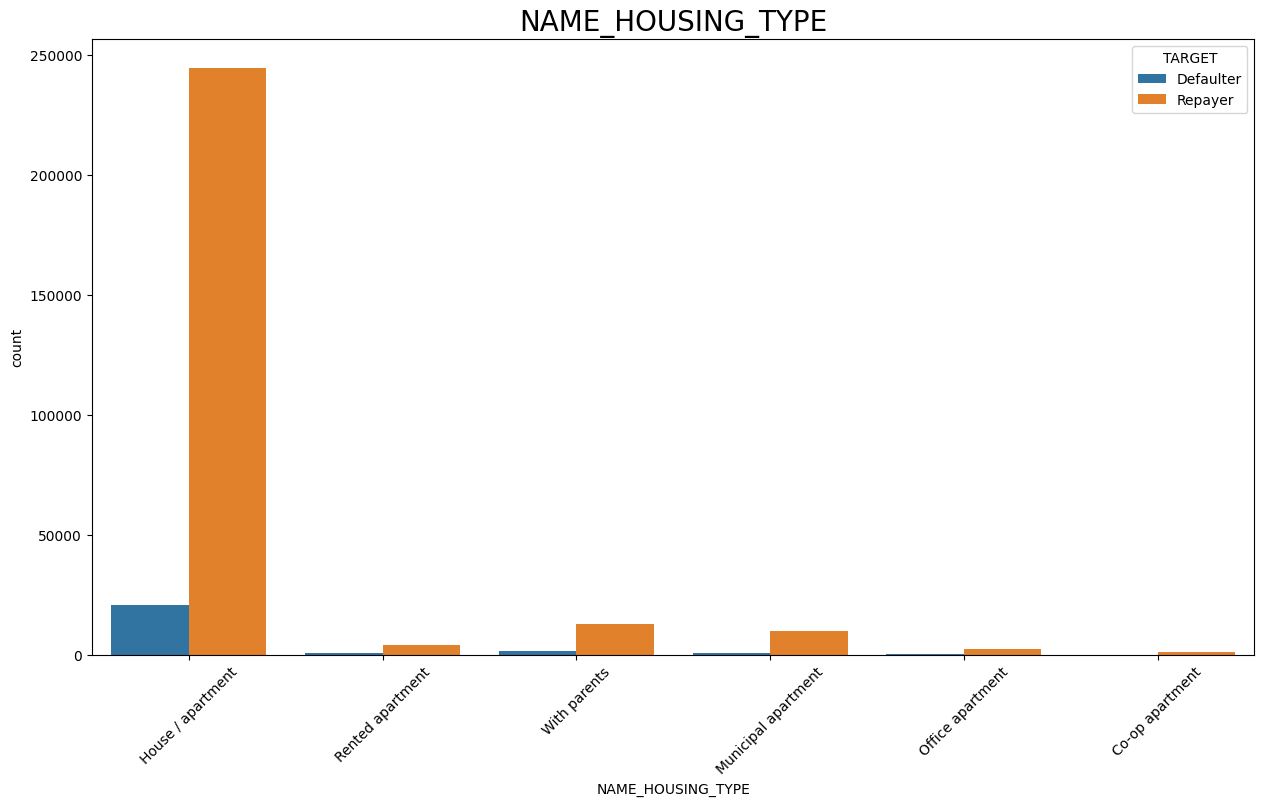

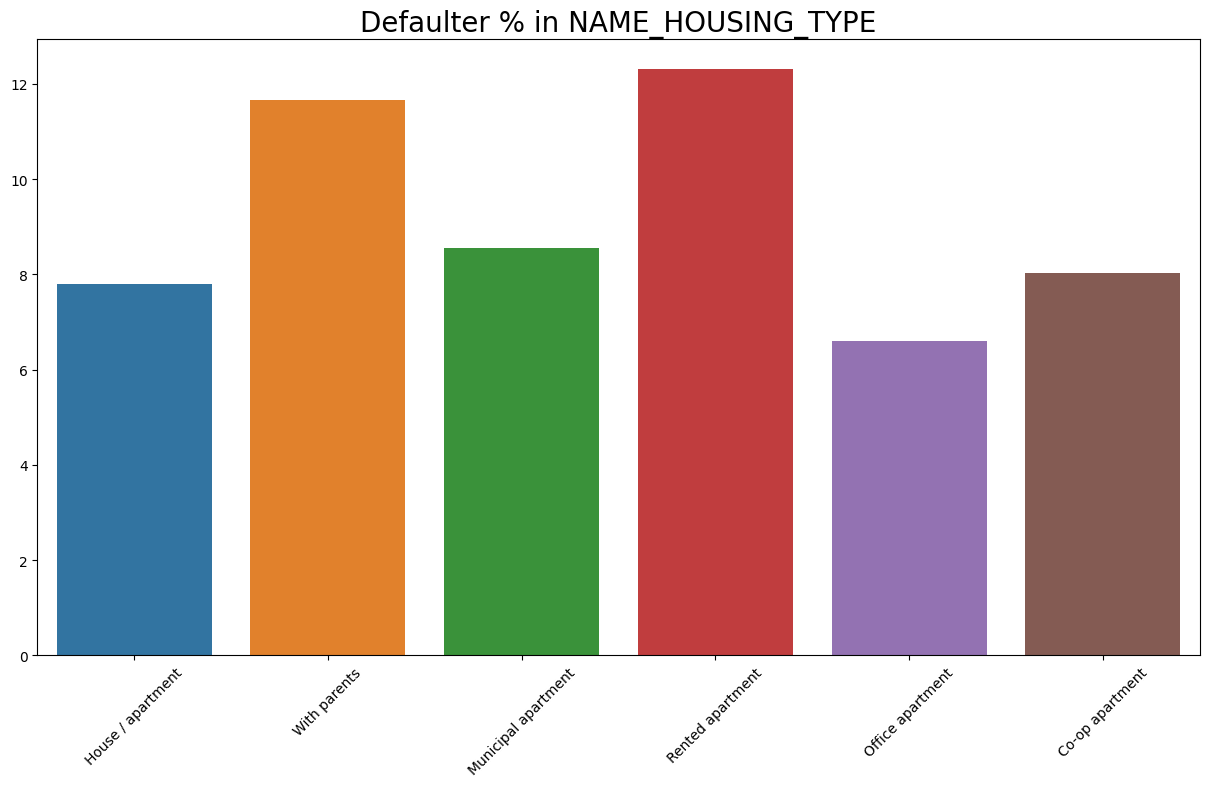

In [93]:
univariate(df1,'NAME_HOUSING_TYPE','TARGET')

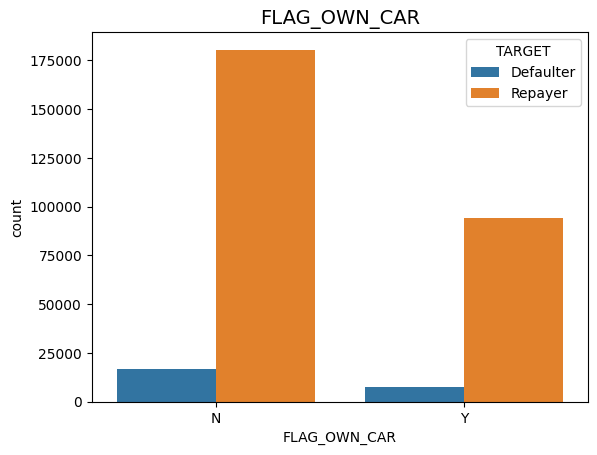

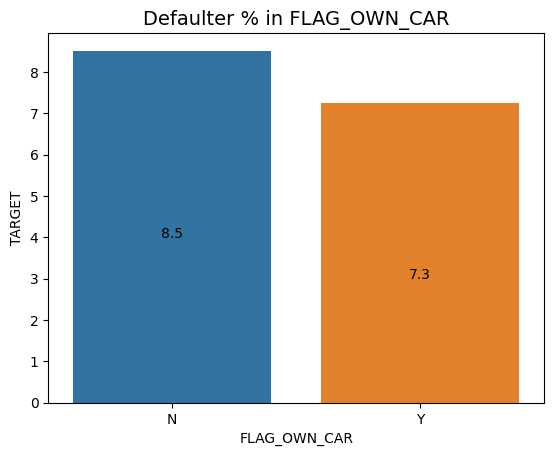

In [94]:
univariate(df1,'FLAG_OWN_CAR','TARGET')

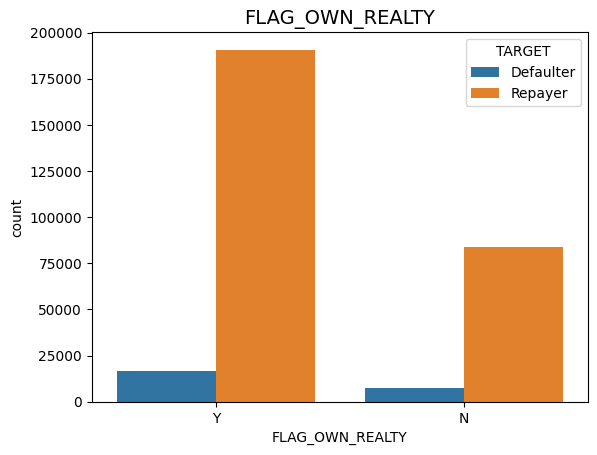

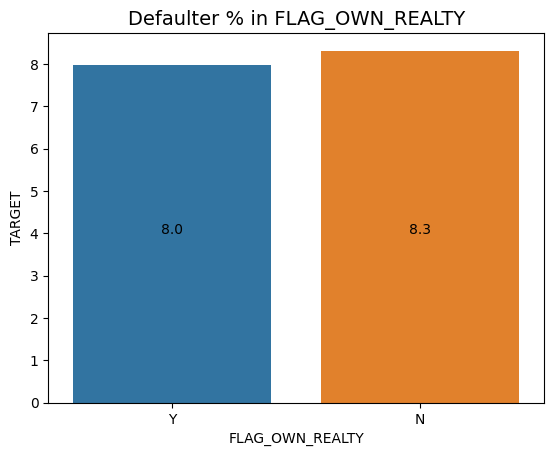

In [95]:
univariate(df1,'FLAG_OWN_REALTY','TARGET')

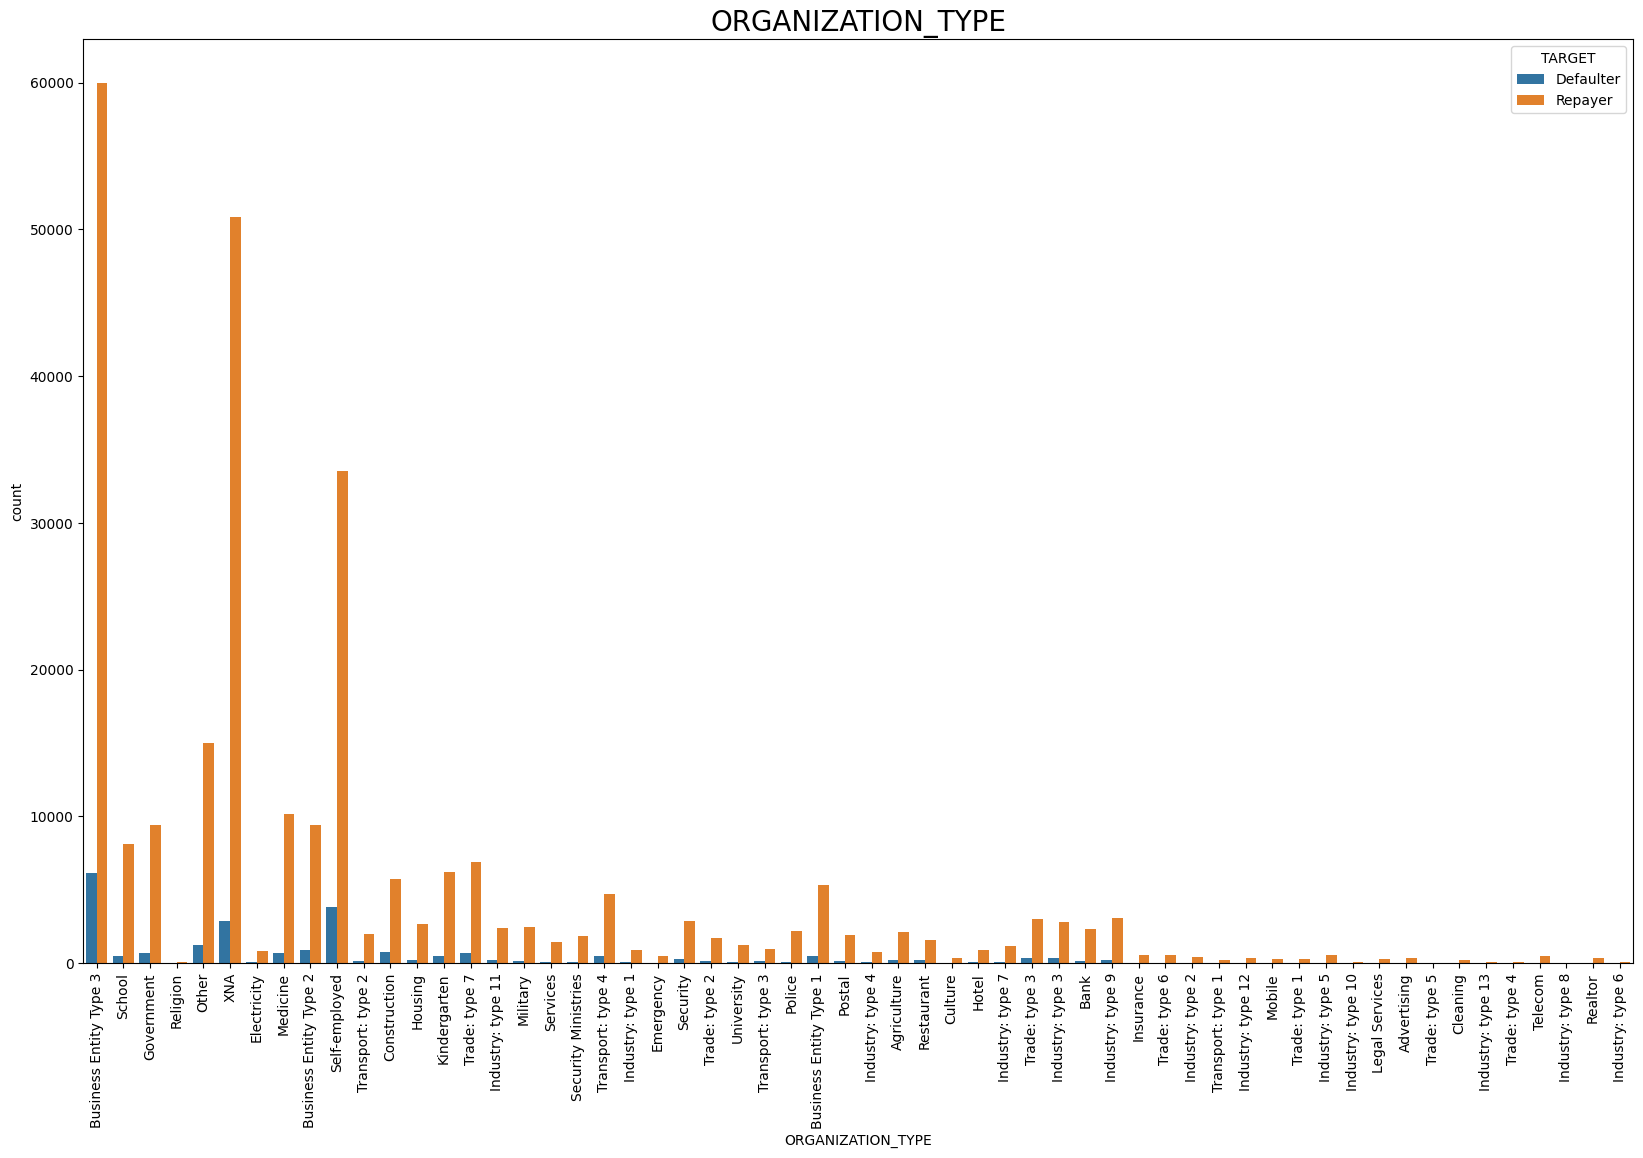

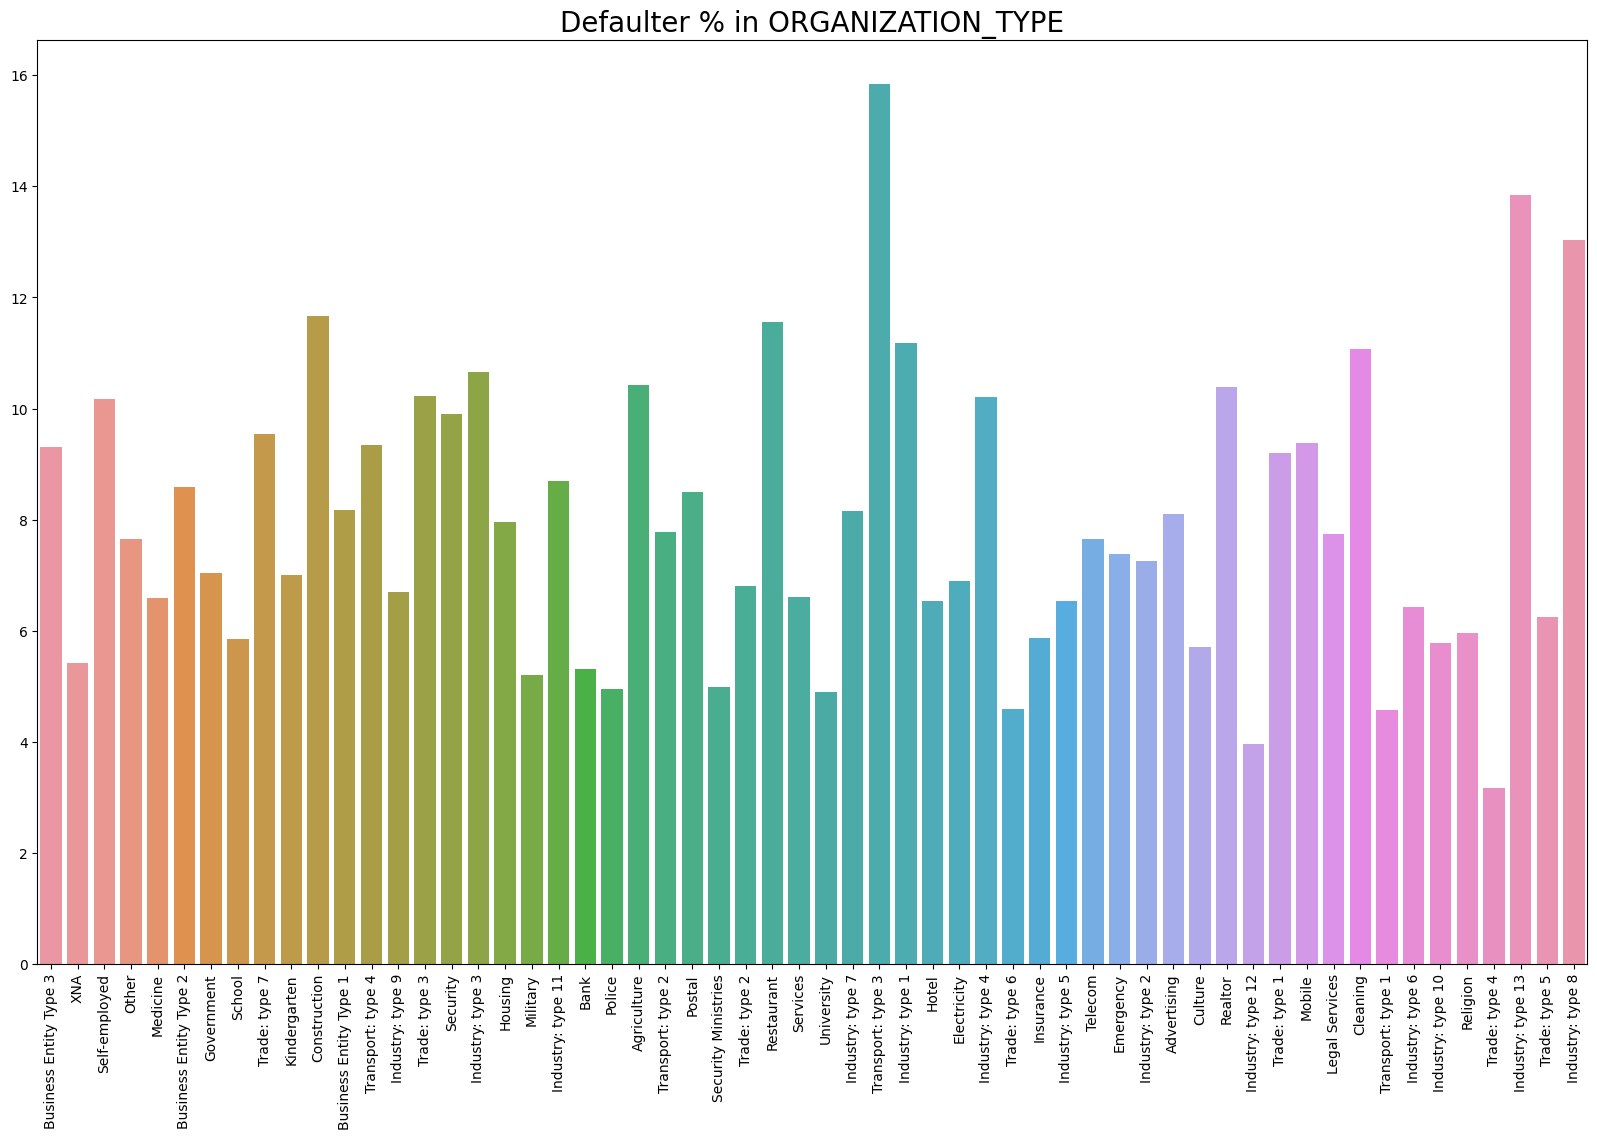

In [96]:
univariate(df1,'ORGANIZATION_TYPE','TARGET')

### #Convert AMT_INCOME_TOTAL to bins

In [97]:
incomebins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
incomeslots = ['0-25000','25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
df1['AMT_INCOME_TOTAL_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins=incomebins,labels=incomeslots)

### #Convert AMT_CREDIT to bins

In [98]:
creditbins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
creditslots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']
df1['AMT_CREDIT_RANGE'] = pd.cut(df1.AMT_CREDIT,bins=creditbins,labels=creditslots)

### #Univariate analysis for AMT_INCOME_TOTAL_RANGE

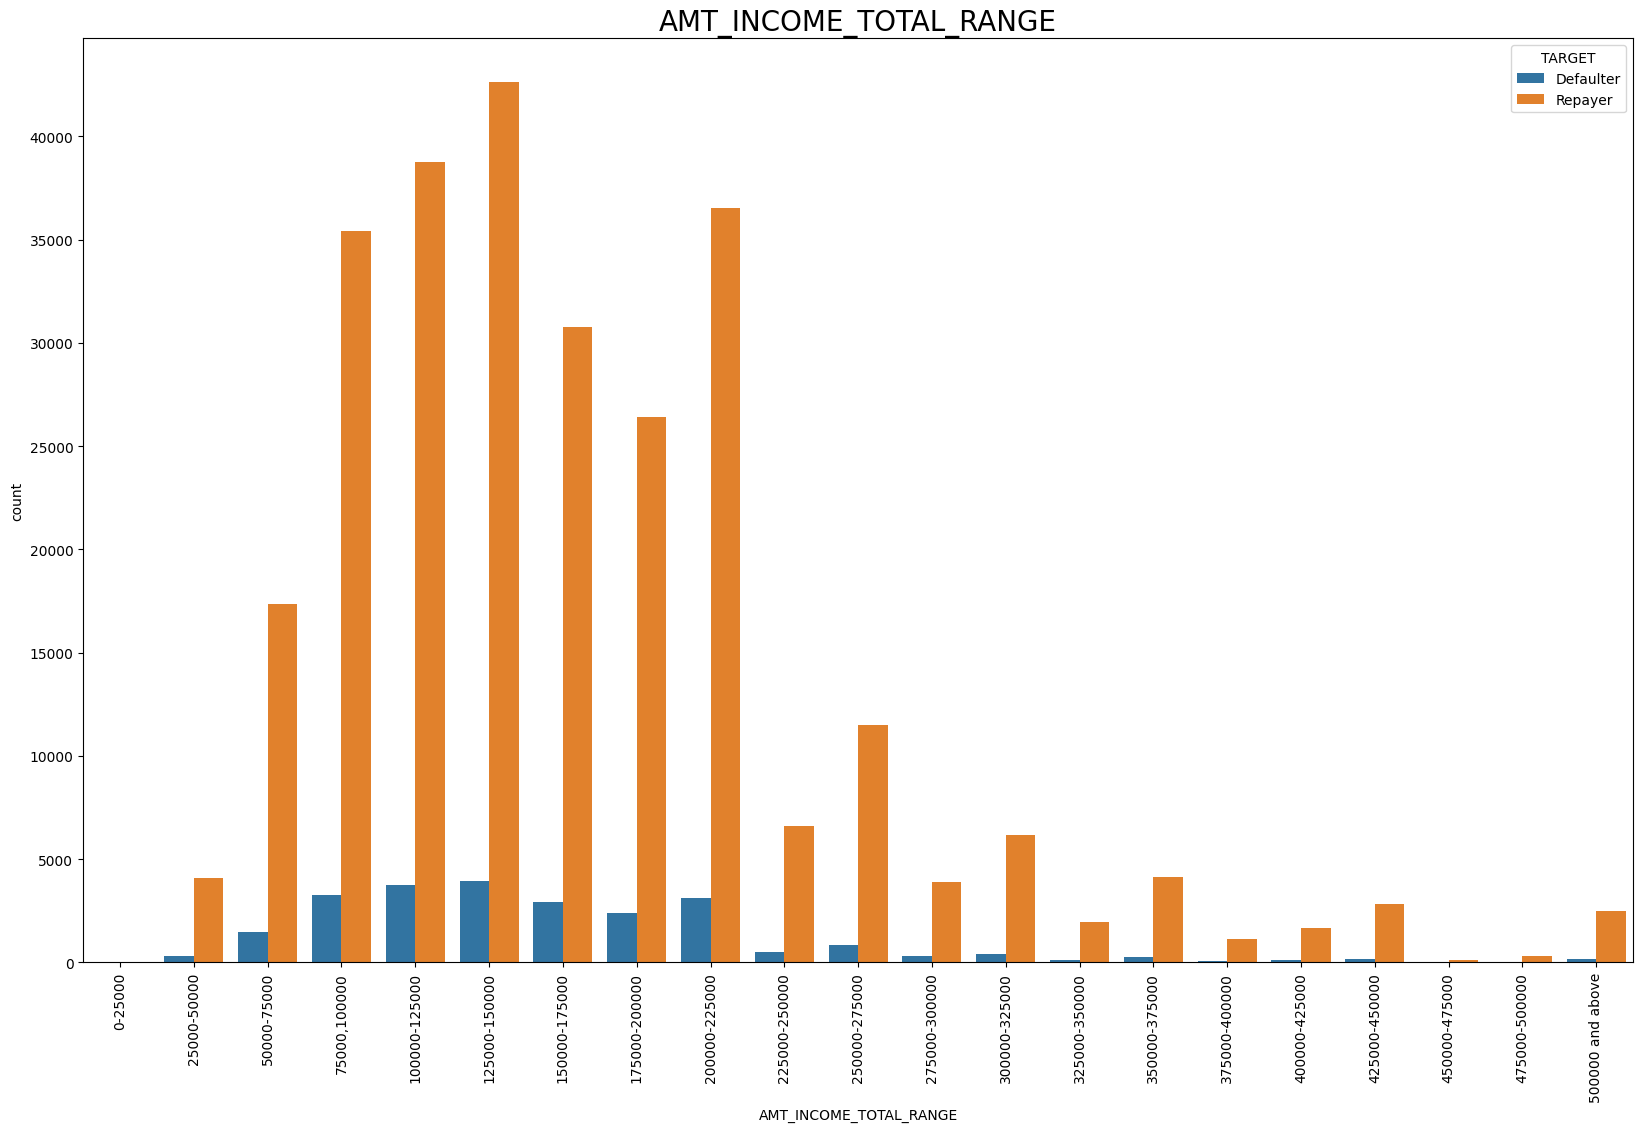

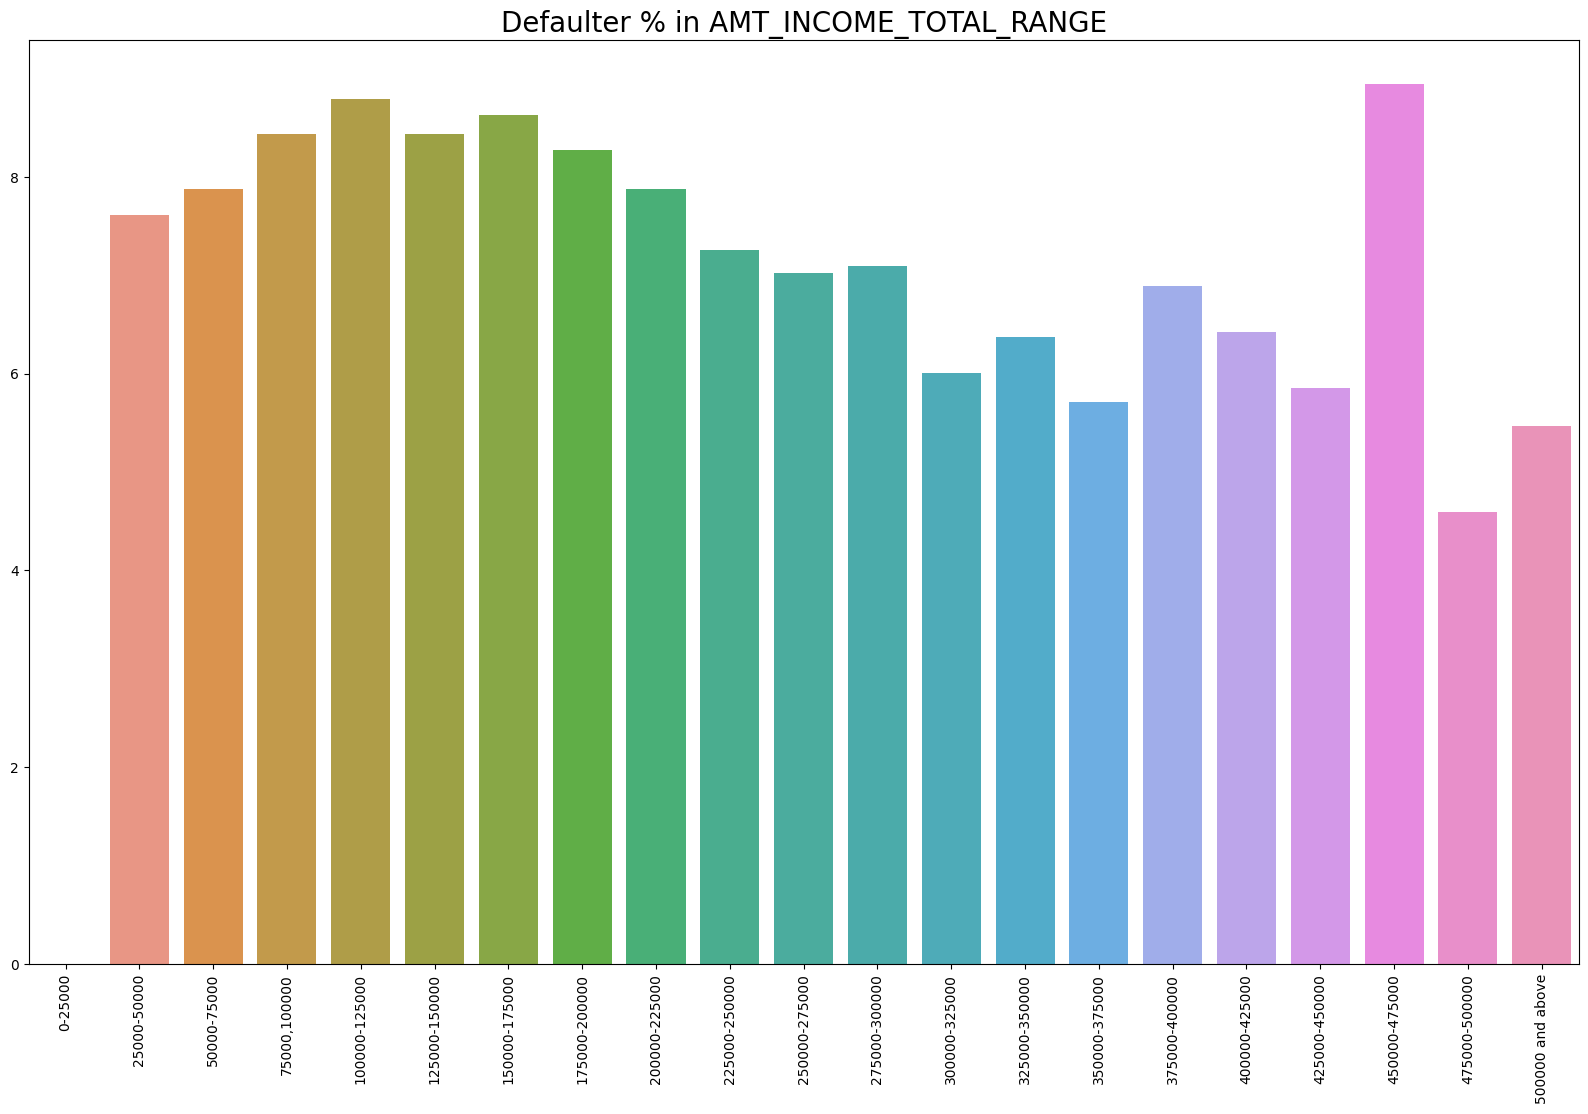

In [99]:
univariate(df1,'AMT_INCOME_TOTAL_RANGE','TARGET')

### #Univariate analysis for AMT_CREDIT

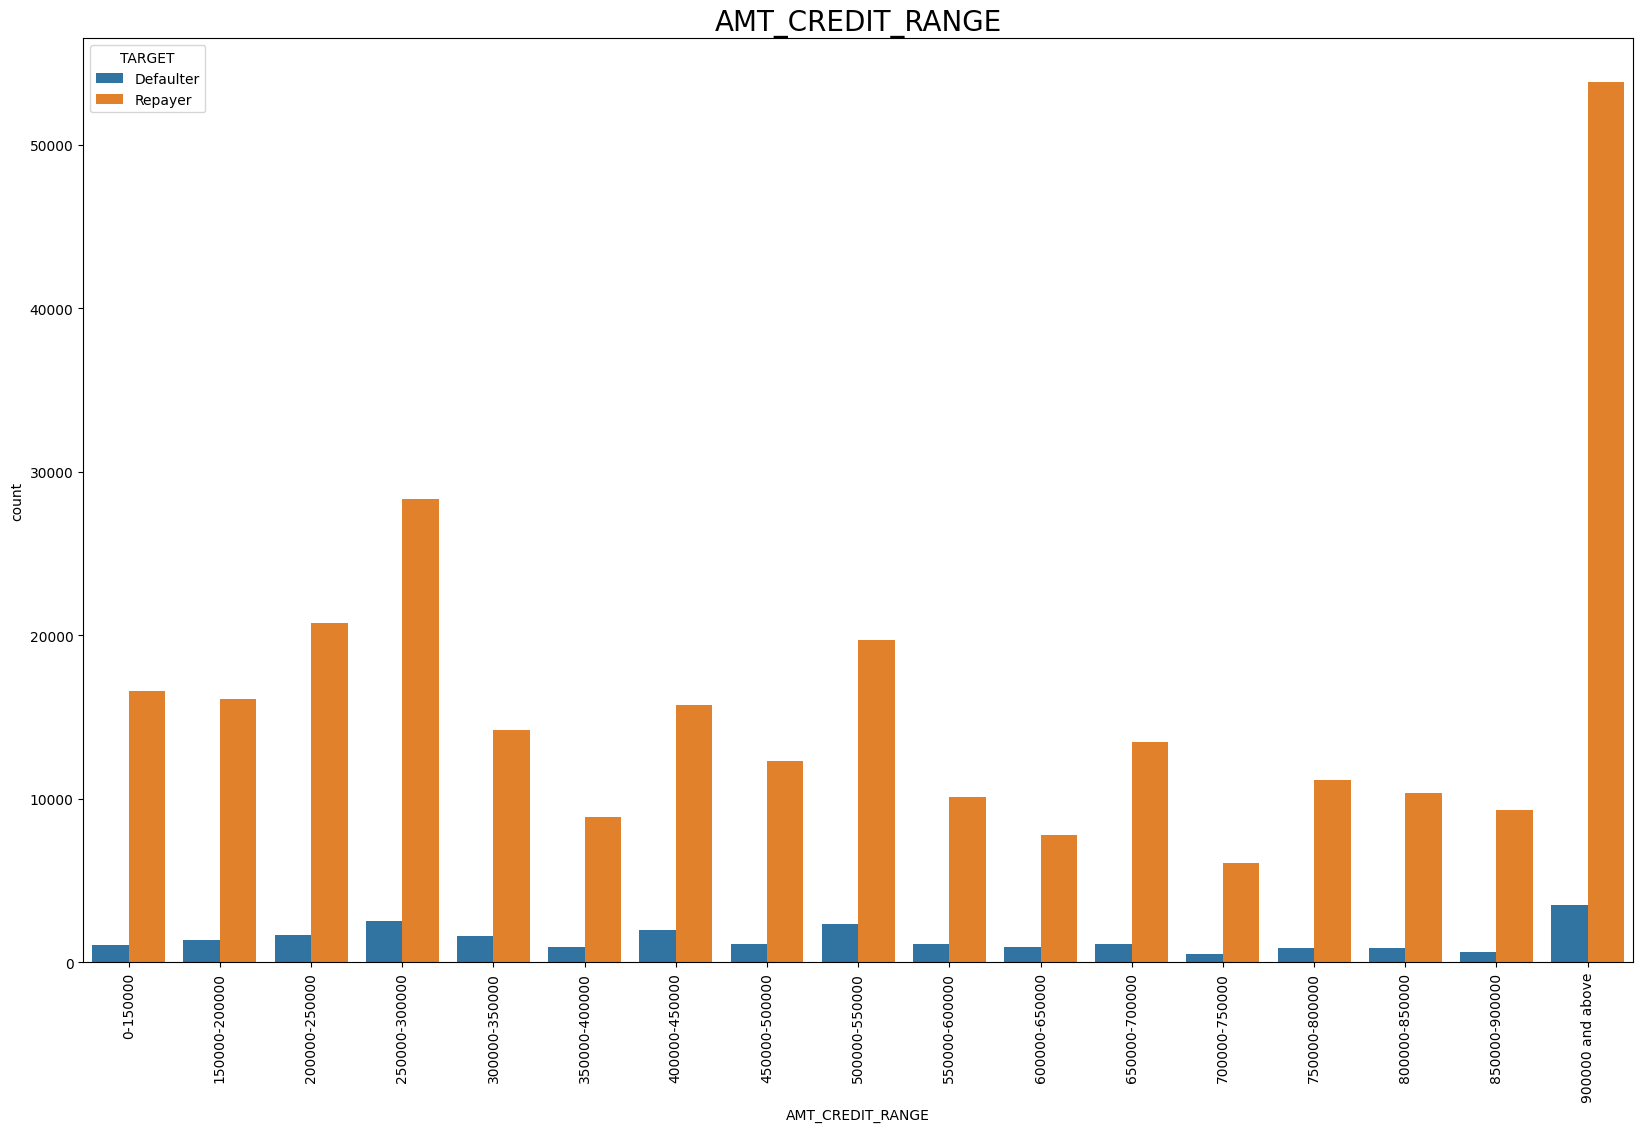

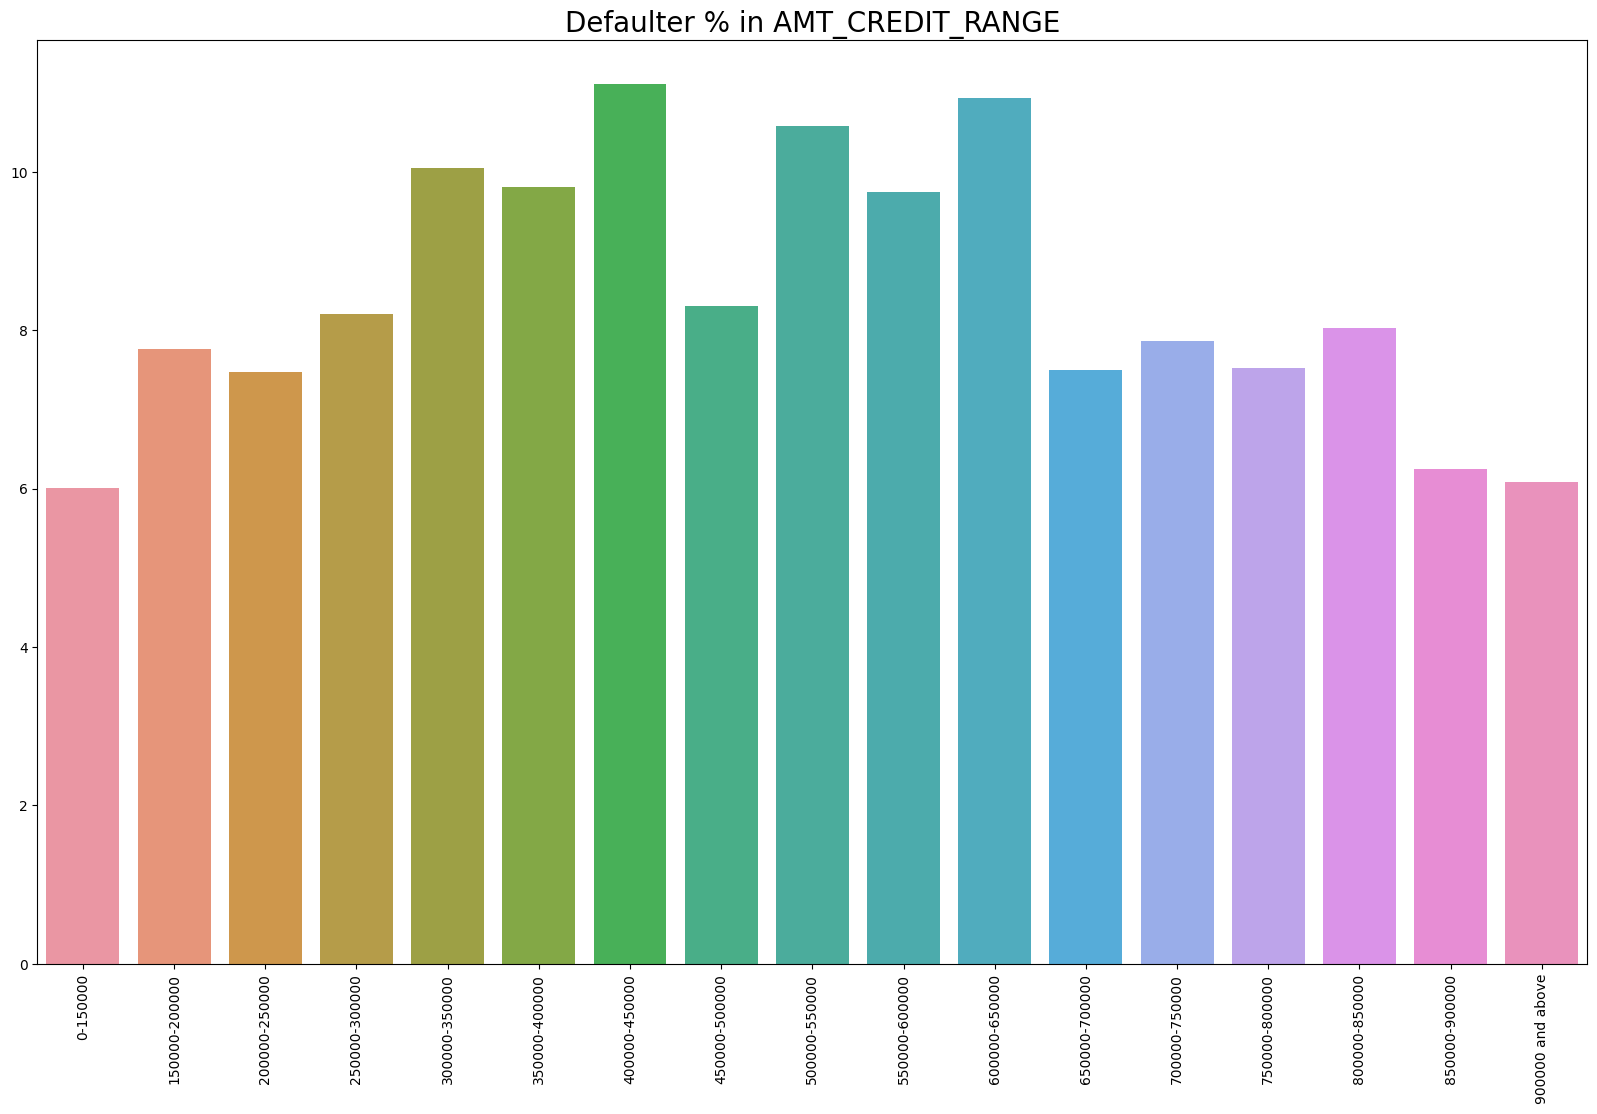

In [100]:
univariate(df1,'AMT_CREDIT_RANGE','TARGET')

## Bivariate analysis for application_data.csv

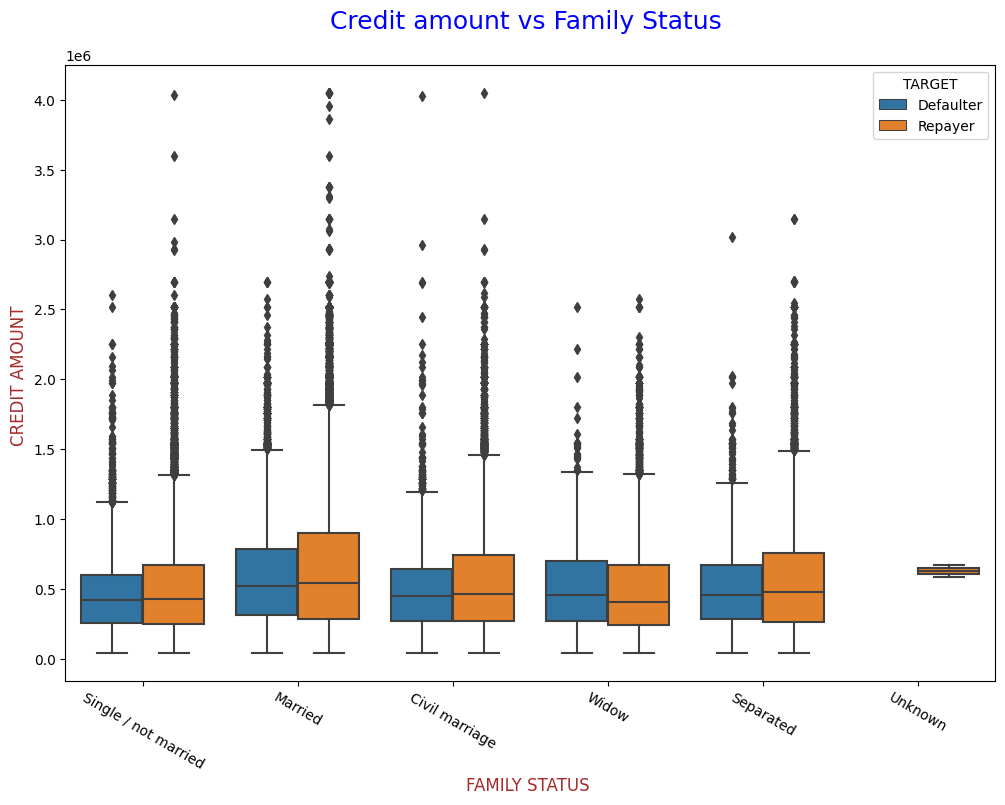

In [101]:
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=df1,x=df1.NAME_FAMILY_STATUS,y=df1.AMT_CREDIT,hue=df1.TARGET)
plt.xticks(rotation=-30)
plt.xlabel("FAMILY STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("CREDIT AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Credit amount vs Family Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()


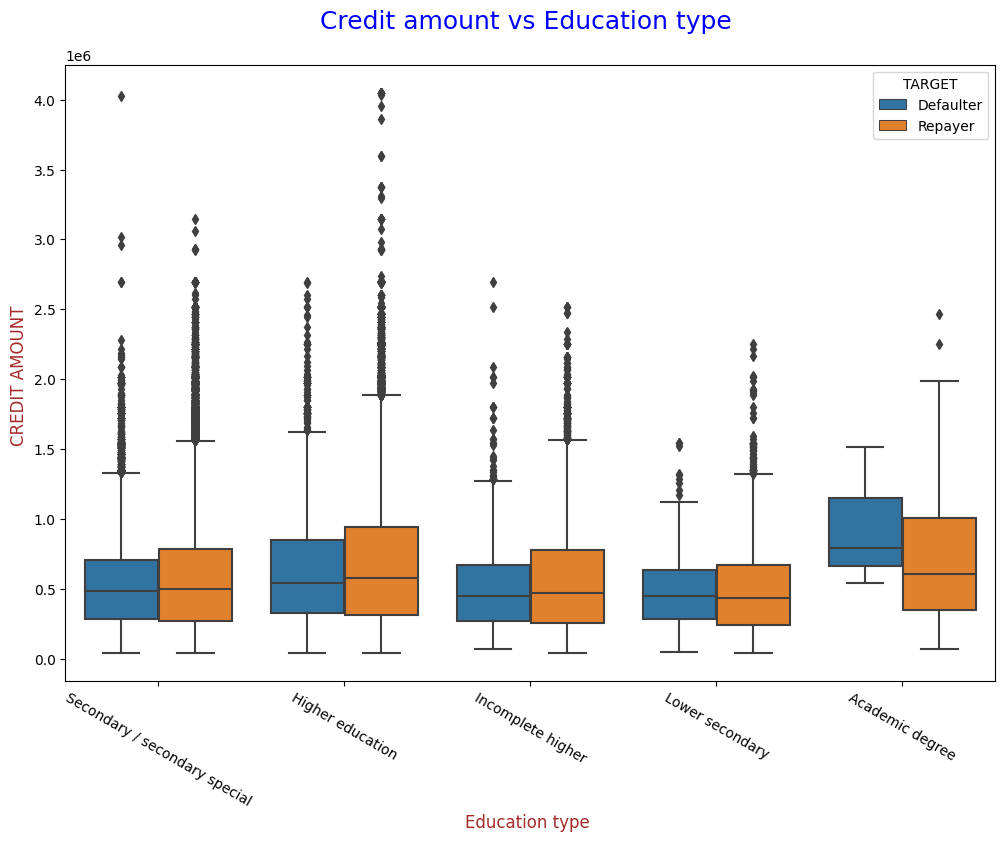

In [102]:
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=df1,x=df1.NAME_EDUCATION_TYPE,y=df1.AMT_CREDIT,hue=df1.TARGET)
plt.xticks(rotation=-30)
plt.xlabel("Education type ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("CREDIT AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Credit amount vs Education type \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()


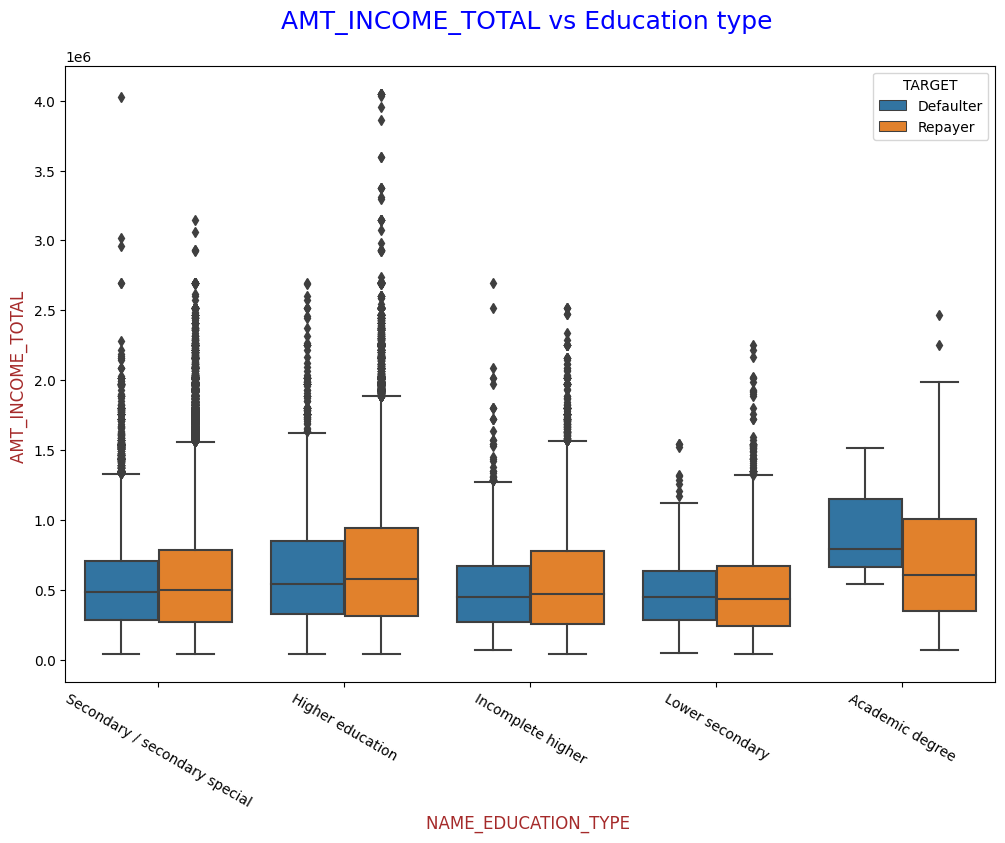

In [104]:
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=df1,x=df1.NAME_EDUCATION_TYPE,y=df1.AMT_CREDIT,hue=df1.TARGET)
plt.xticks(rotation=-30)
plt.xlabel("NAME_EDUCATION_TYPE ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMT_INCOME_TOTAL ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('AMT_INCOME_TOTAL vs Education type \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()


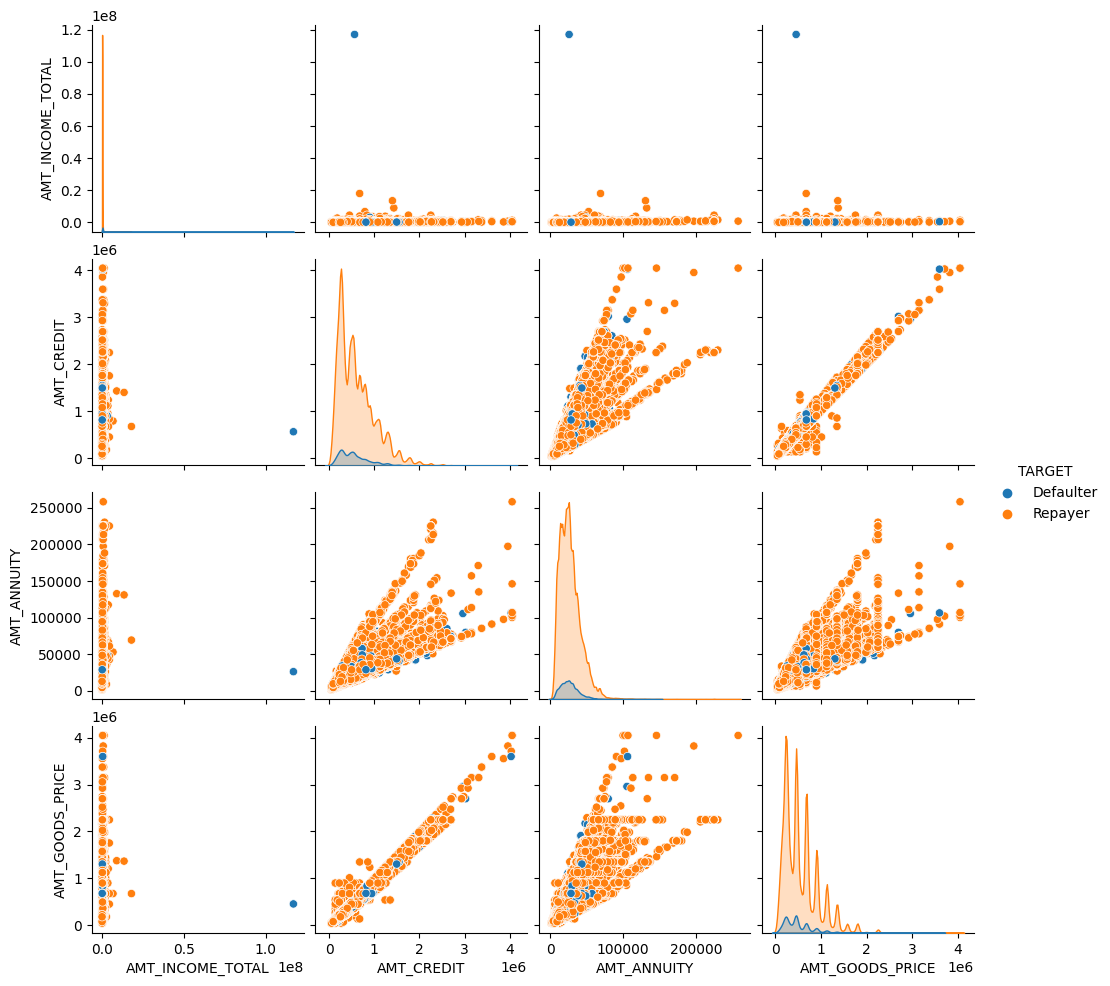

In [106]:
amount = df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
sns.pairplot(amount,hue = 'TARGET')

## Correlation check for the defaulter in application_data.csv

In [107]:
defaulter_df = df1[df1['TARGET']==1]


           Var1                        Var2  Correlation
0  CNT_CHILDREN                CNT_CHILDREN          NaN
1  CNT_CHILDREN            AMT_INCOME_TOTAL          NaN
2  CNT_CHILDREN                  AMT_CREDIT          NaN
3  CNT_CHILDREN                 AMT_ANNUITY          NaN
4  CNT_CHILDREN             AMT_GOODS_PRICE          NaN
5  CNT_CHILDREN  REGION_POPULATION_RELATIVE          NaN
6  CNT_CHILDREN                         AGE          NaN
7  CNT_CHILDREN          YEARS_REGISTRATION          NaN
8  CNT_CHILDREN            YEARS_ID_PUBLISH          NaN
9  CNT_CHILDREN             FLAG_WORK_PHONE          NaN


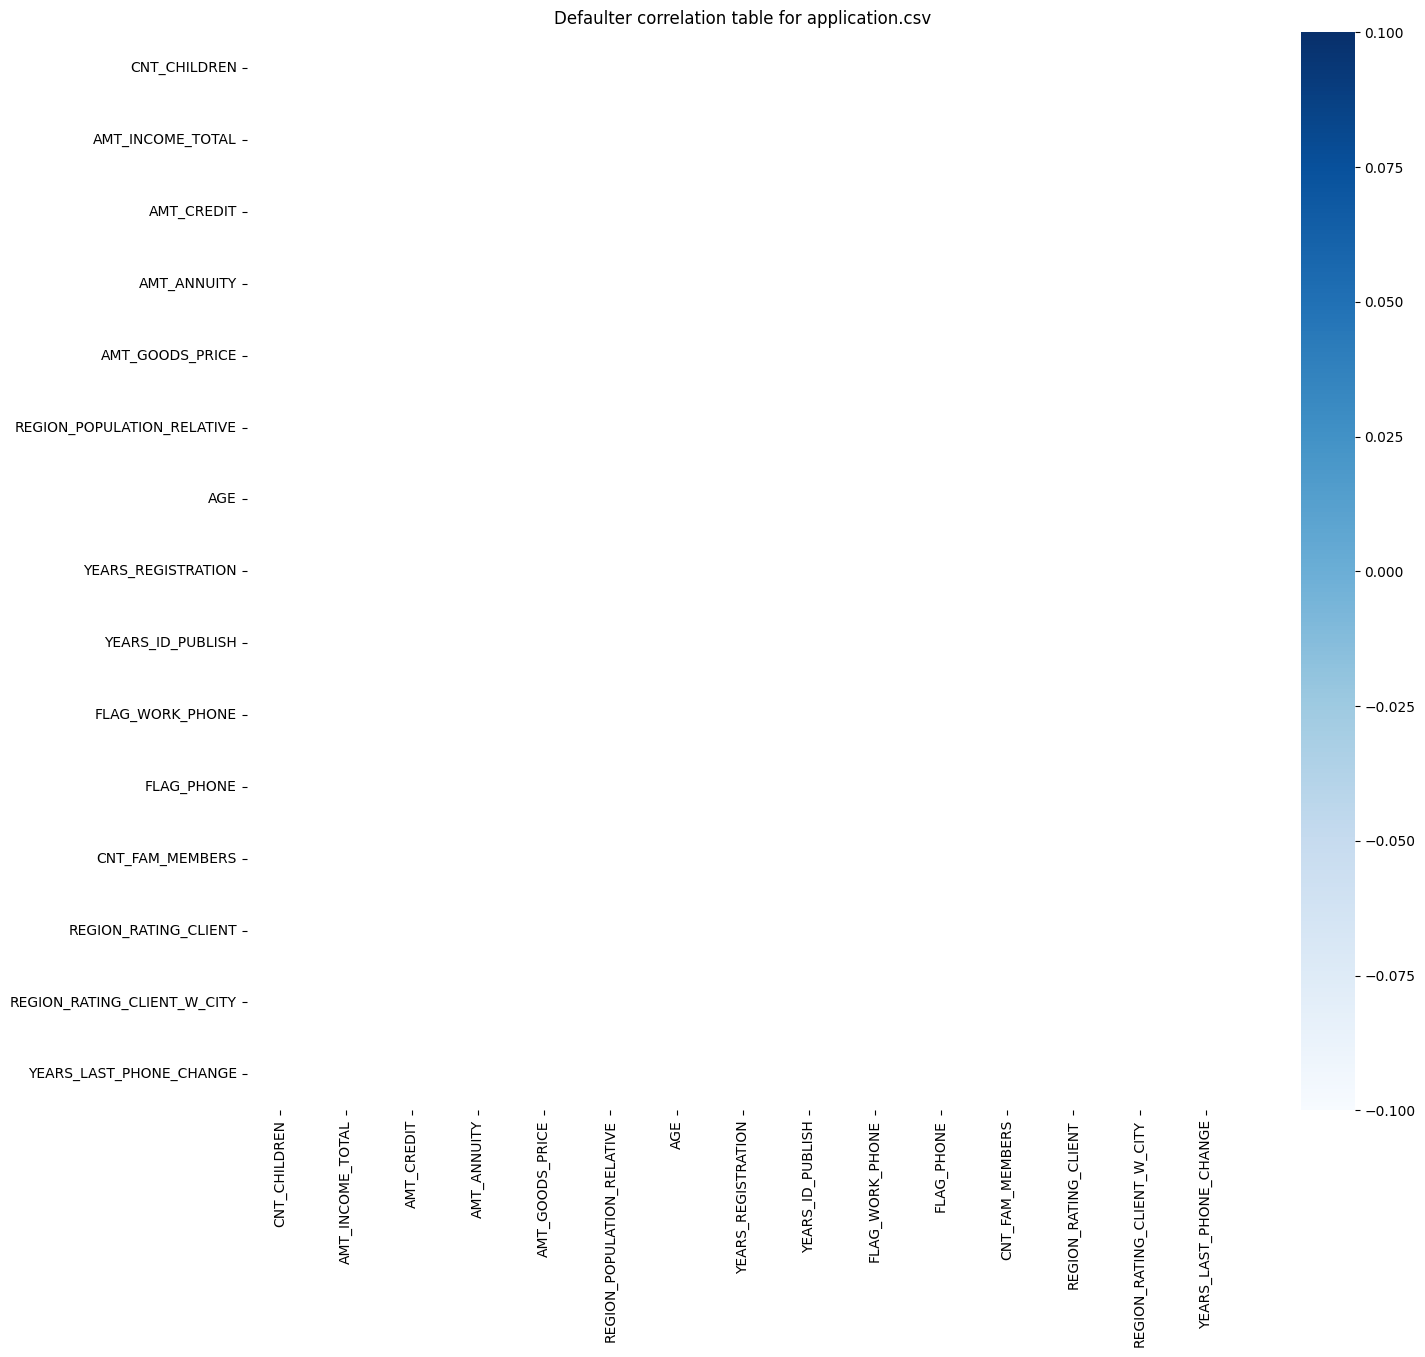

In [108]:
corr2 = defaulter_df[['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE','YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_WORK_PHONE','FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','YEARS_LAST_PHONE_CHANGE']].corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr2,cmap='Blues',annot=True,linewidth=0.5)
plt.title('Defaulter correlation table for application.csv')
corr2 = corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(bool))
corr_mat = corr2.unstack().sort_values(ascending=False).reset_index()
corr_mat.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'},inplace=True )
print(corr_mat.head(10))


## Univariate analysis of merged data frame

In [109]:
mergedf = df1.merge(df, on='SK_ID_CURR')

Text(0.5, 1.0, 'Count contract type wrt contract status')

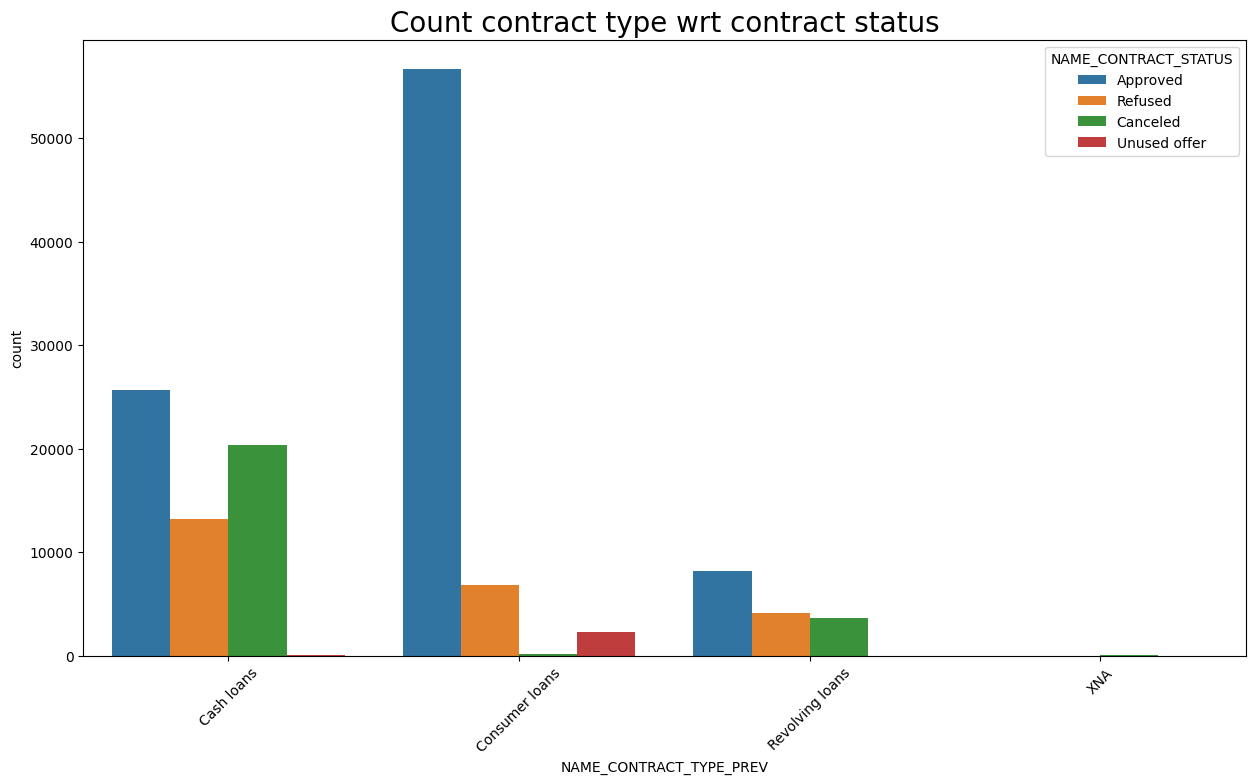

In [110]:
mergedf = mergedf.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV','AMT_CREDIT_y':'AMT_CREDIT_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV','WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
plt.figure(figsize = (15,8))
sns.countplot(x = mergedf['NAME_CONTRACT_TYPE_PREV'], hue = mergedf['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 45)
plt.title('Count contract type wrt contract status',fontdict={'fontsize': 20})

## Bivariate analysis of merged data frame


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

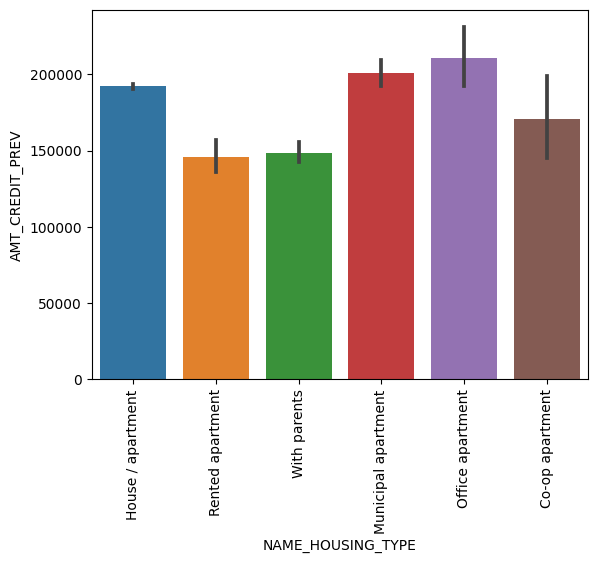

In [113]:
sns.barplot(data=mergedf,x = 'NAME_HOUSING_TYPE',y = 'AMT_CREDIT_PREV' )
plt.xticks(rotation=90)

## Correlation check for previous_application.csv

<Figure size 2000x1400 with 0 Axes>

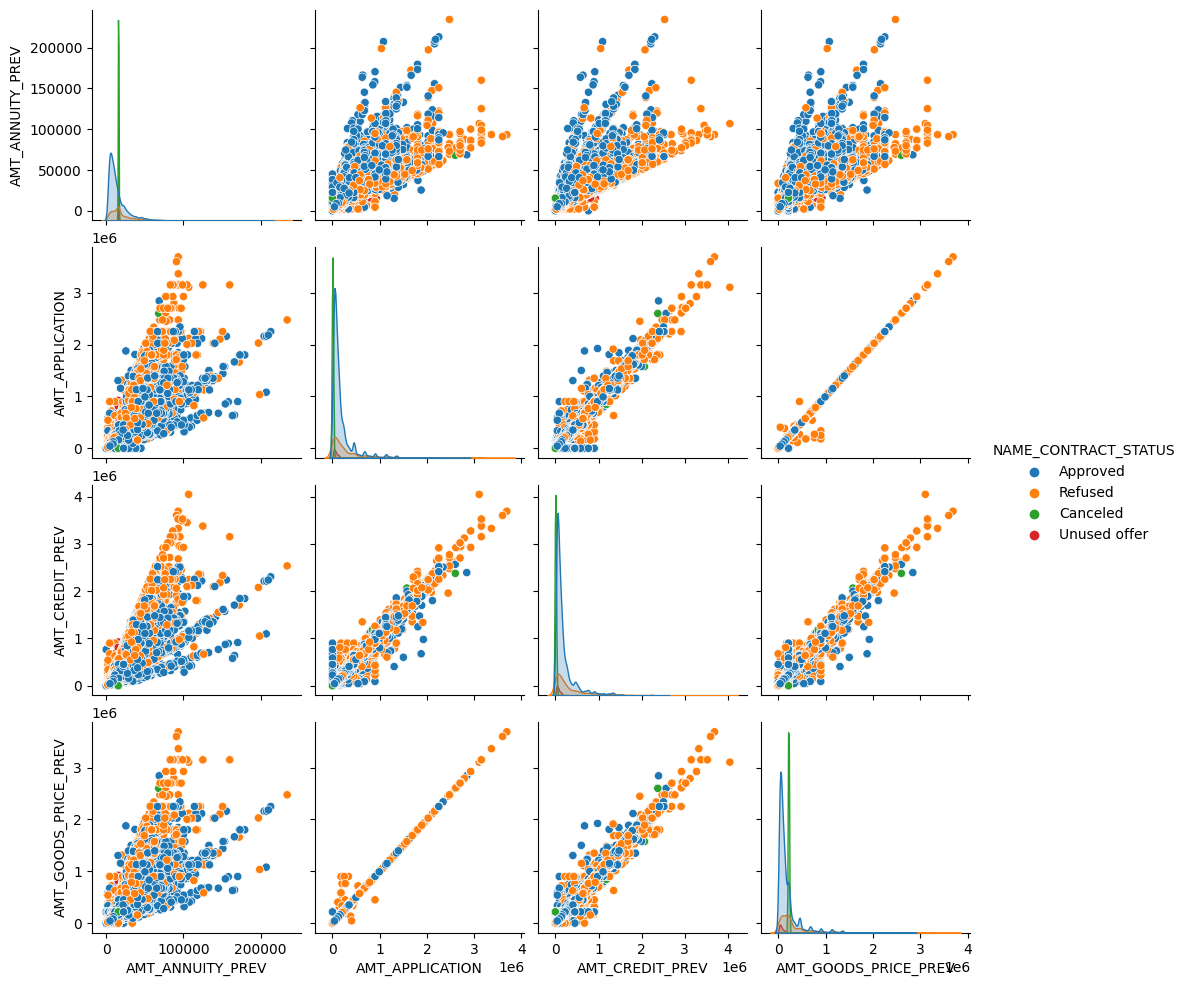

In [114]:
plt.figure(figsize=(20,14))
amount = mergedf[['AMT_ANNUITY_PREV', 'AMT_APPLICATION',
 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV','NAME_CONTRACT_STATUS']]
sns.pairplot(amount,hue = 'NAME_CONTRACT_STATUS')

In [115]:
corr4 = mergedf[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE',
 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_WORK_PHONE',
 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE',
 'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION',
 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']].corr()


                          Var1                        Var2  Correlation
0     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998471
1              AMT_GOODS_PRICE                  AMT_CREDIT     0.985963
2              AMT_CREDIT_PREV             AMT_APPLICATION     0.975958
3         AMT_GOODS_PRICE_PREV             AMT_APPLICATION     0.949702
4  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.948084
5         AMT_GOODS_PRICE_PREV             AMT_CREDIT_PREV     0.943099
6              CNT_FAM_MEMBERS                CNT_CHILDREN     0.880690
7  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.877206
8     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.860852
9      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.833795


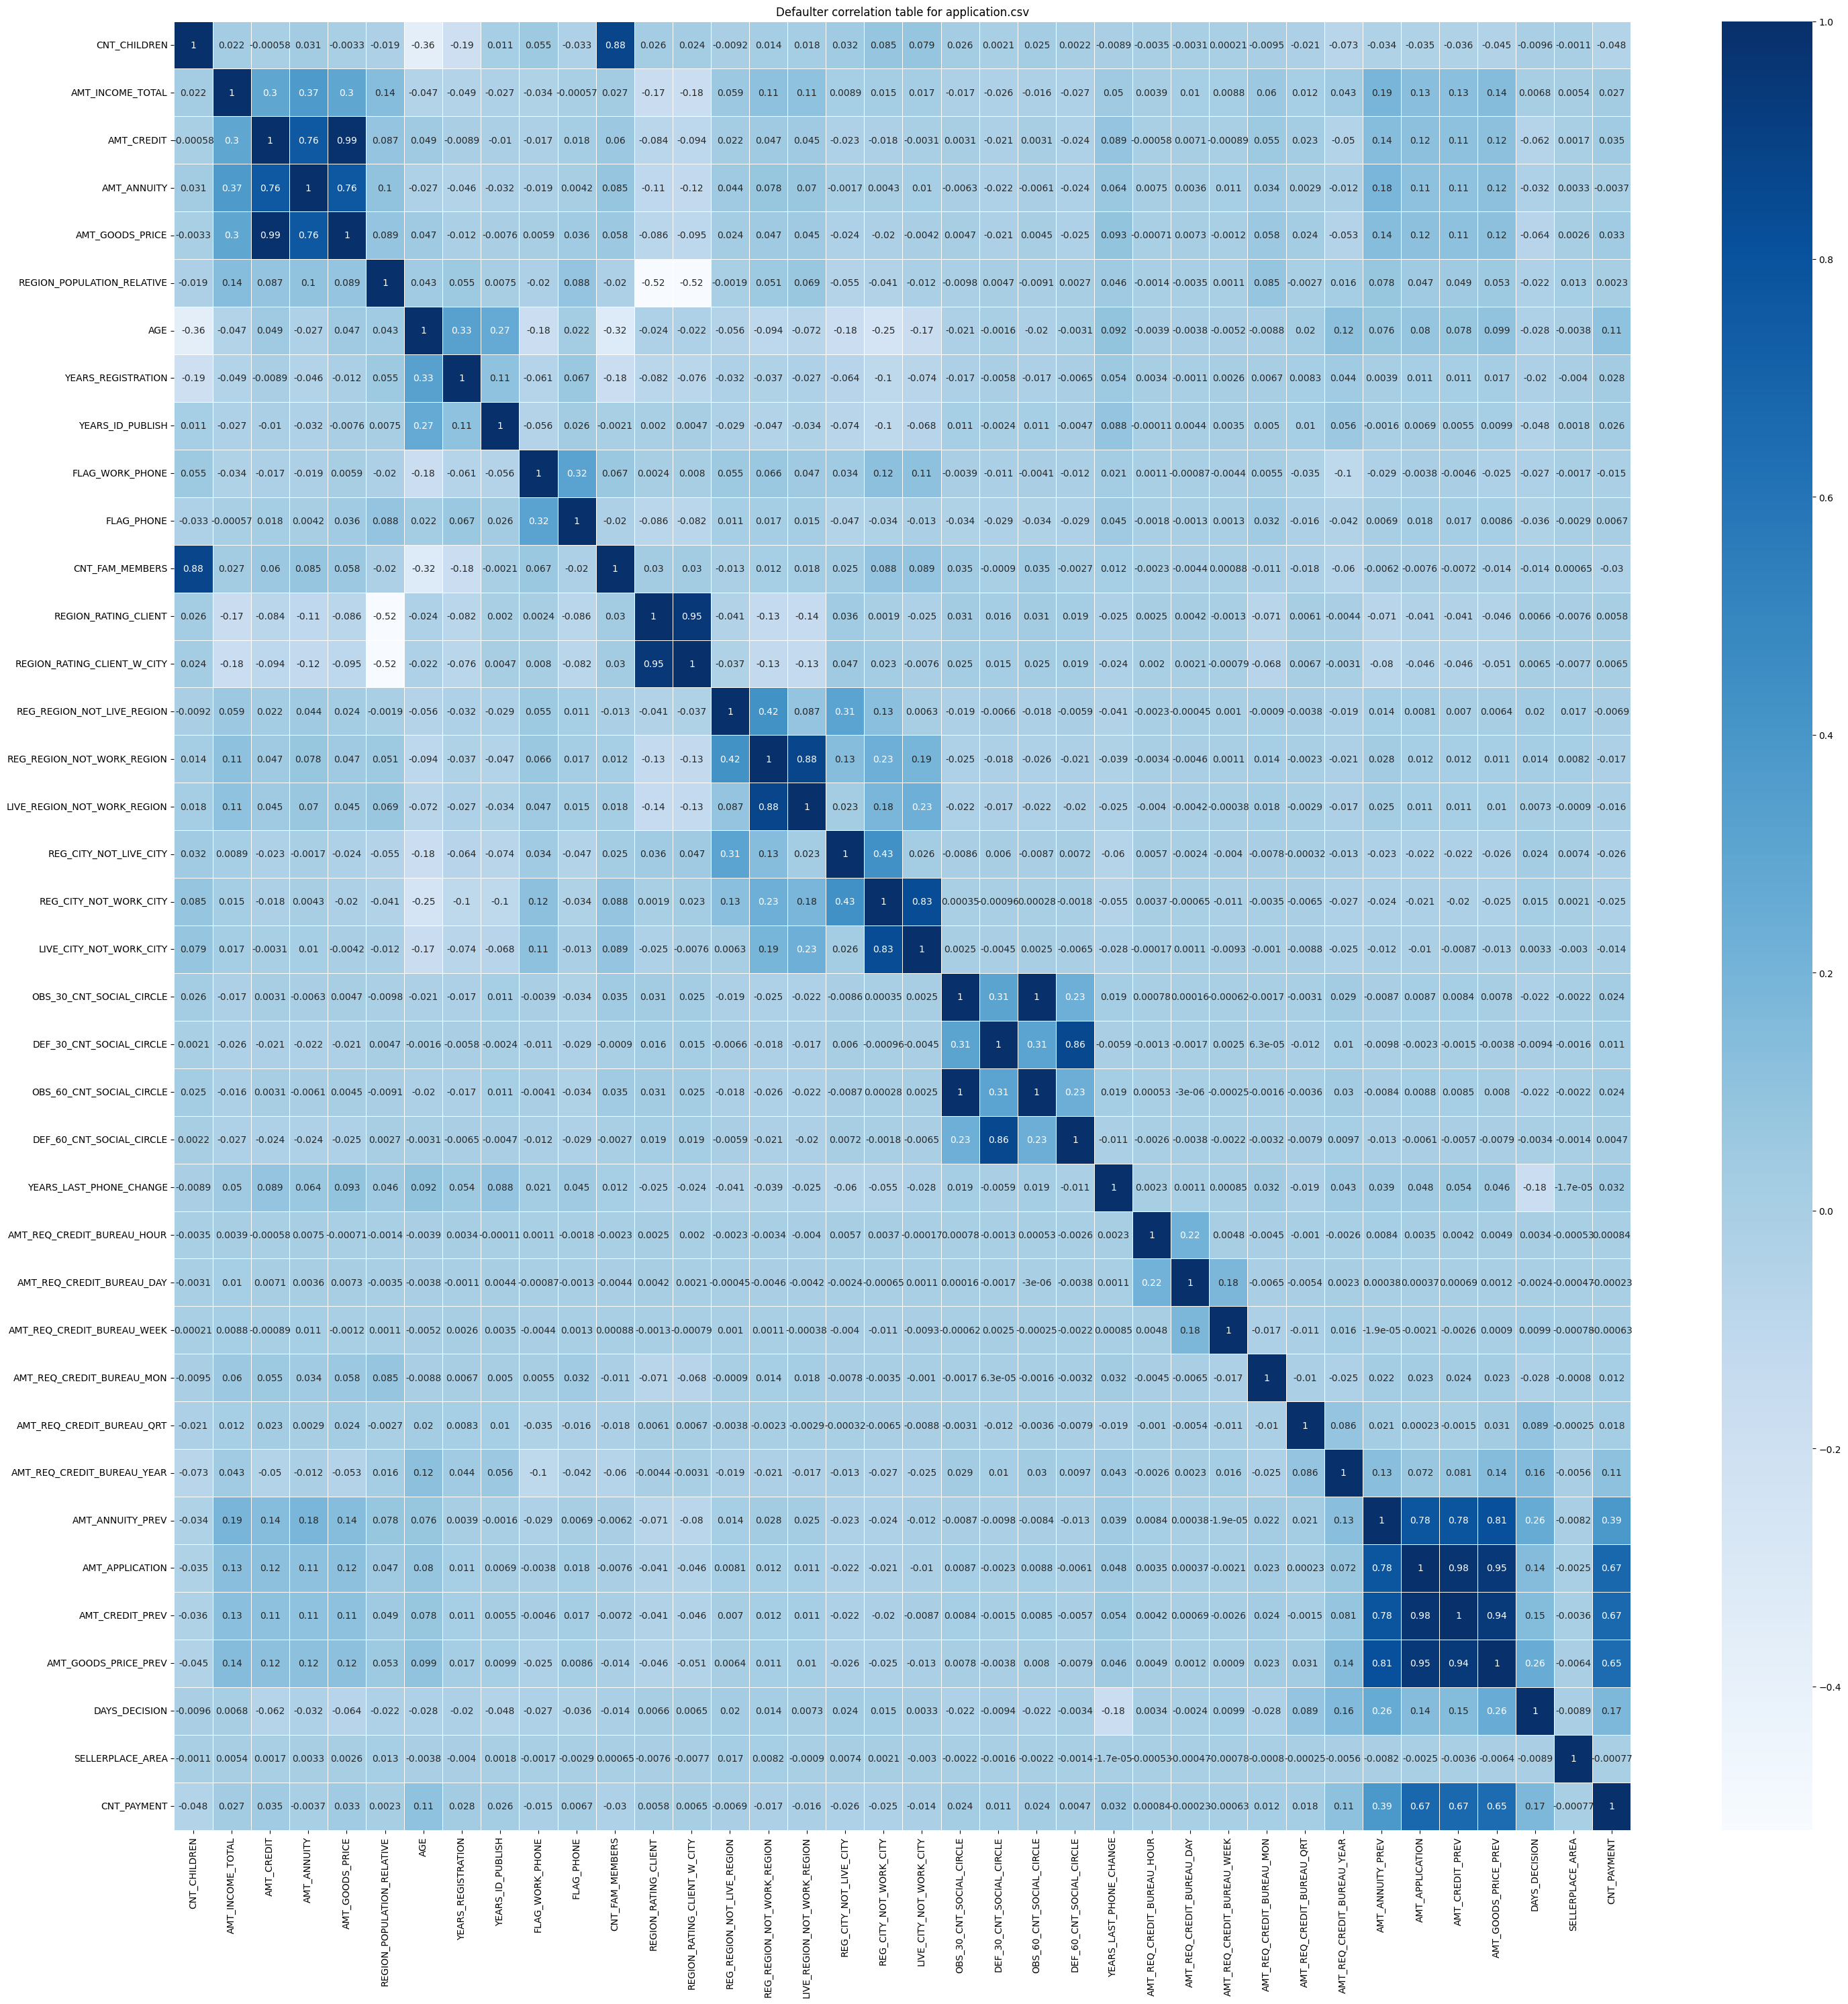

In [116]:
plt.figure(figsize=(35,35))
sns.heatmap(corr4,cmap='Blues',annot=True,linewidth=0.5)
plt.title('Defaulter correlation table for application.csv')
corr5 = corr4.where(np.triu(np.ones(corr4.shape), k=1).astype(bool))
corr_mat = corr5.unstack().sort_values(ascending=False).reset_index()
corr_mat.rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'},inplace=True )
print(corr_mat.head(10))